## Composition data
- get the composition and band gap data

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import os
%matplotlib inline  
%config InlineBackend.figure_format = 'retina'

In [2]:
current_dir = os.getcwd()
current_dir

'c:\\Users\\Fortyfour\\Desktop\\graduation_design\\New_Scripts'

In [71]:
data_df = pd.read_csv('./Data/mp_eda_data.csv')

In [72]:
# get the composition and bandgap data
mp_df = data_df[['composition', 'band_gap']]

In [73]:
# transform the composition_str column to composition column
from matminer.featurizers.conversions import StrToComposition

stc = StrToComposition(target_col_id='composition_type')
mp_trans_df = stc.featurize_dataframe(mp_df, 'composition')

StrToComposition: 100%|██████████| 10342/10342 [00:06<00:00, 1632.73it/s]


In [74]:
mp_trans_df.head()

,composition,band_gap,composition_type
0,Ac16 S24,2.2962,"(Ac, S)"
1,Ac1 Ag1 Te2,0.0794,"(Ac, Ag, Te)"
2,Ac1 Cr1 O3,2.0031,"(Ac, Cr, O)"
3,Ac1 Fe1 O3,0.9888,"(Ac, Fe, O)"
4,Ac1 Ga1 O3,2.8959,"(Ac, Ga, O)"


In [75]:
mp_trans_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10342 entries, 0 to 10341
Data columns (total 3 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   composition       10342 non-null  object 
 1   band_gap          10342 non-null  float64
 2   composition_type  10342 non-null  object 
dtypes: float64(1), object(2)
memory usage: 242.5+ KB


In [76]:
mp_trans_df['composition'] = mp_trans_df['composition_type']
mp_trans_df.drop(columns=['composition_type'], inplace=True)
mp_trans_df.head()

,composition,band_gap
0,"(Ac, S)",2.2962
1,"(Ac, Ag, Te)",0.0794
2,"(Ac, Cr, O)",2.0031
3,"(Ac, Fe, O)",0.9888
4,"(Ac, Ga, O)",2.8959


### 去除不需要的元素

In [77]:
from pymatgen.core import Element
# 不包括重金属元素和稀土元素
exclude_elements = ['Hf', 'Ta', 'W', 'Re', 'Os', 'Ir', 'Pt', 'Au', 'Hg', 'Tl', 'Pb', 'Bi', 'Po',
                    'At', 'Rn', 'Fr', 'Ra', 'Ac', 'Th', 'Pa', 'U', 'Np', 'Pu', 'Am', 'Cm', 'Bk', 'Cf',
                    'Es', 'Fm', 'Md', 'No', 'Lr', 'Rf', 'Db', 'Sg', 'Bh', 'Hs', 'Mt', 'Ds', 'Rg',
                    'Cn', 'Nh', 'Fl', 'Mc', 'Lv', 'Ts', 'Og', 'La', 'Ce', 'Pr', 'Nd', 'Pm',
                    'Sm', 'Eu', 'Gd', 'Tb', 'Dy', 'Ho', 'Er', 'Tm', 'Yb', 'Lu']
exclude_elements = [Element(el) for el in exclude_elements]
noble_gas_elements = ['He', 'Ne', 'Ar', 'Kr', 'Xe', 'Rn']
noble_gas_elements = [Element(el) for el in noble_gas_elements]
len(exclude_elements), len(noble_gas_elements)

(62, 6)

In [78]:
# 需去掉的列
mp_trans_df[mp_trans_df['composition'].apply(lambda x: any(elem in exclude_elements for elem in x.elements))].head()

,composition,band_gap
0,"(Ac, S)",2.2962
1,"(Ac, Ag, Te)",0.0794
2,"(Ac, Cr, O)",2.0031
3,"(Ac, Fe, O)",0.9888
4,"(Ac, Ga, O)",2.8959


In [79]:
# 过滤掉包含重金属元素和稀土元素的材料
mp_trans_df = mp_trans_df[~mp_trans_df['composition'].apply(lambda x: any(elem in exclude_elements for elem in x.elements))]
mp_trans_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5520 entries, 12 to 10338
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   composition  5520 non-null   object 
 1   band_gap     5520 non-null   float64
dtypes: float64(1), object(1)
memory usage: 129.4+ KB


In [80]:
# 过滤掉包含惰性气体元素的材料
mp_trans_df = mp_trans_df[~mp_trans_df['composition'].apply(lambda x: any(elem in noble_gas_elements for elem in x.elements))]
mp_trans_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5472 entries, 12 to 10338
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   composition  5472 non-null   object 
 1   band_gap     5472 non-null   float64
dtypes: float64(1), object(1)
memory usage: 128.2+ KB


In [81]:
mp_trans_df['composition'] = mp_trans_df['composition'].apply(lambda x: str(x).replace(" ", ""))
mp_trans_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5472 entries, 12 to 10338
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   composition  5472 non-null   object 
 1   band_gap     5472 non-null   float64
dtypes: float64(1), object(1)
memory usage: 128.2+ KB


In [82]:
# Save the data of composition and band_gap to a csv file
file_path = os.path.join(current_dir, './Data/composition_data/mp_band_gap.csv')
os.makedirs(os.path.dirname(file_path), exist_ok=True)
mp_trans_df.to_csv(file_path, index=False)

### 数据分布

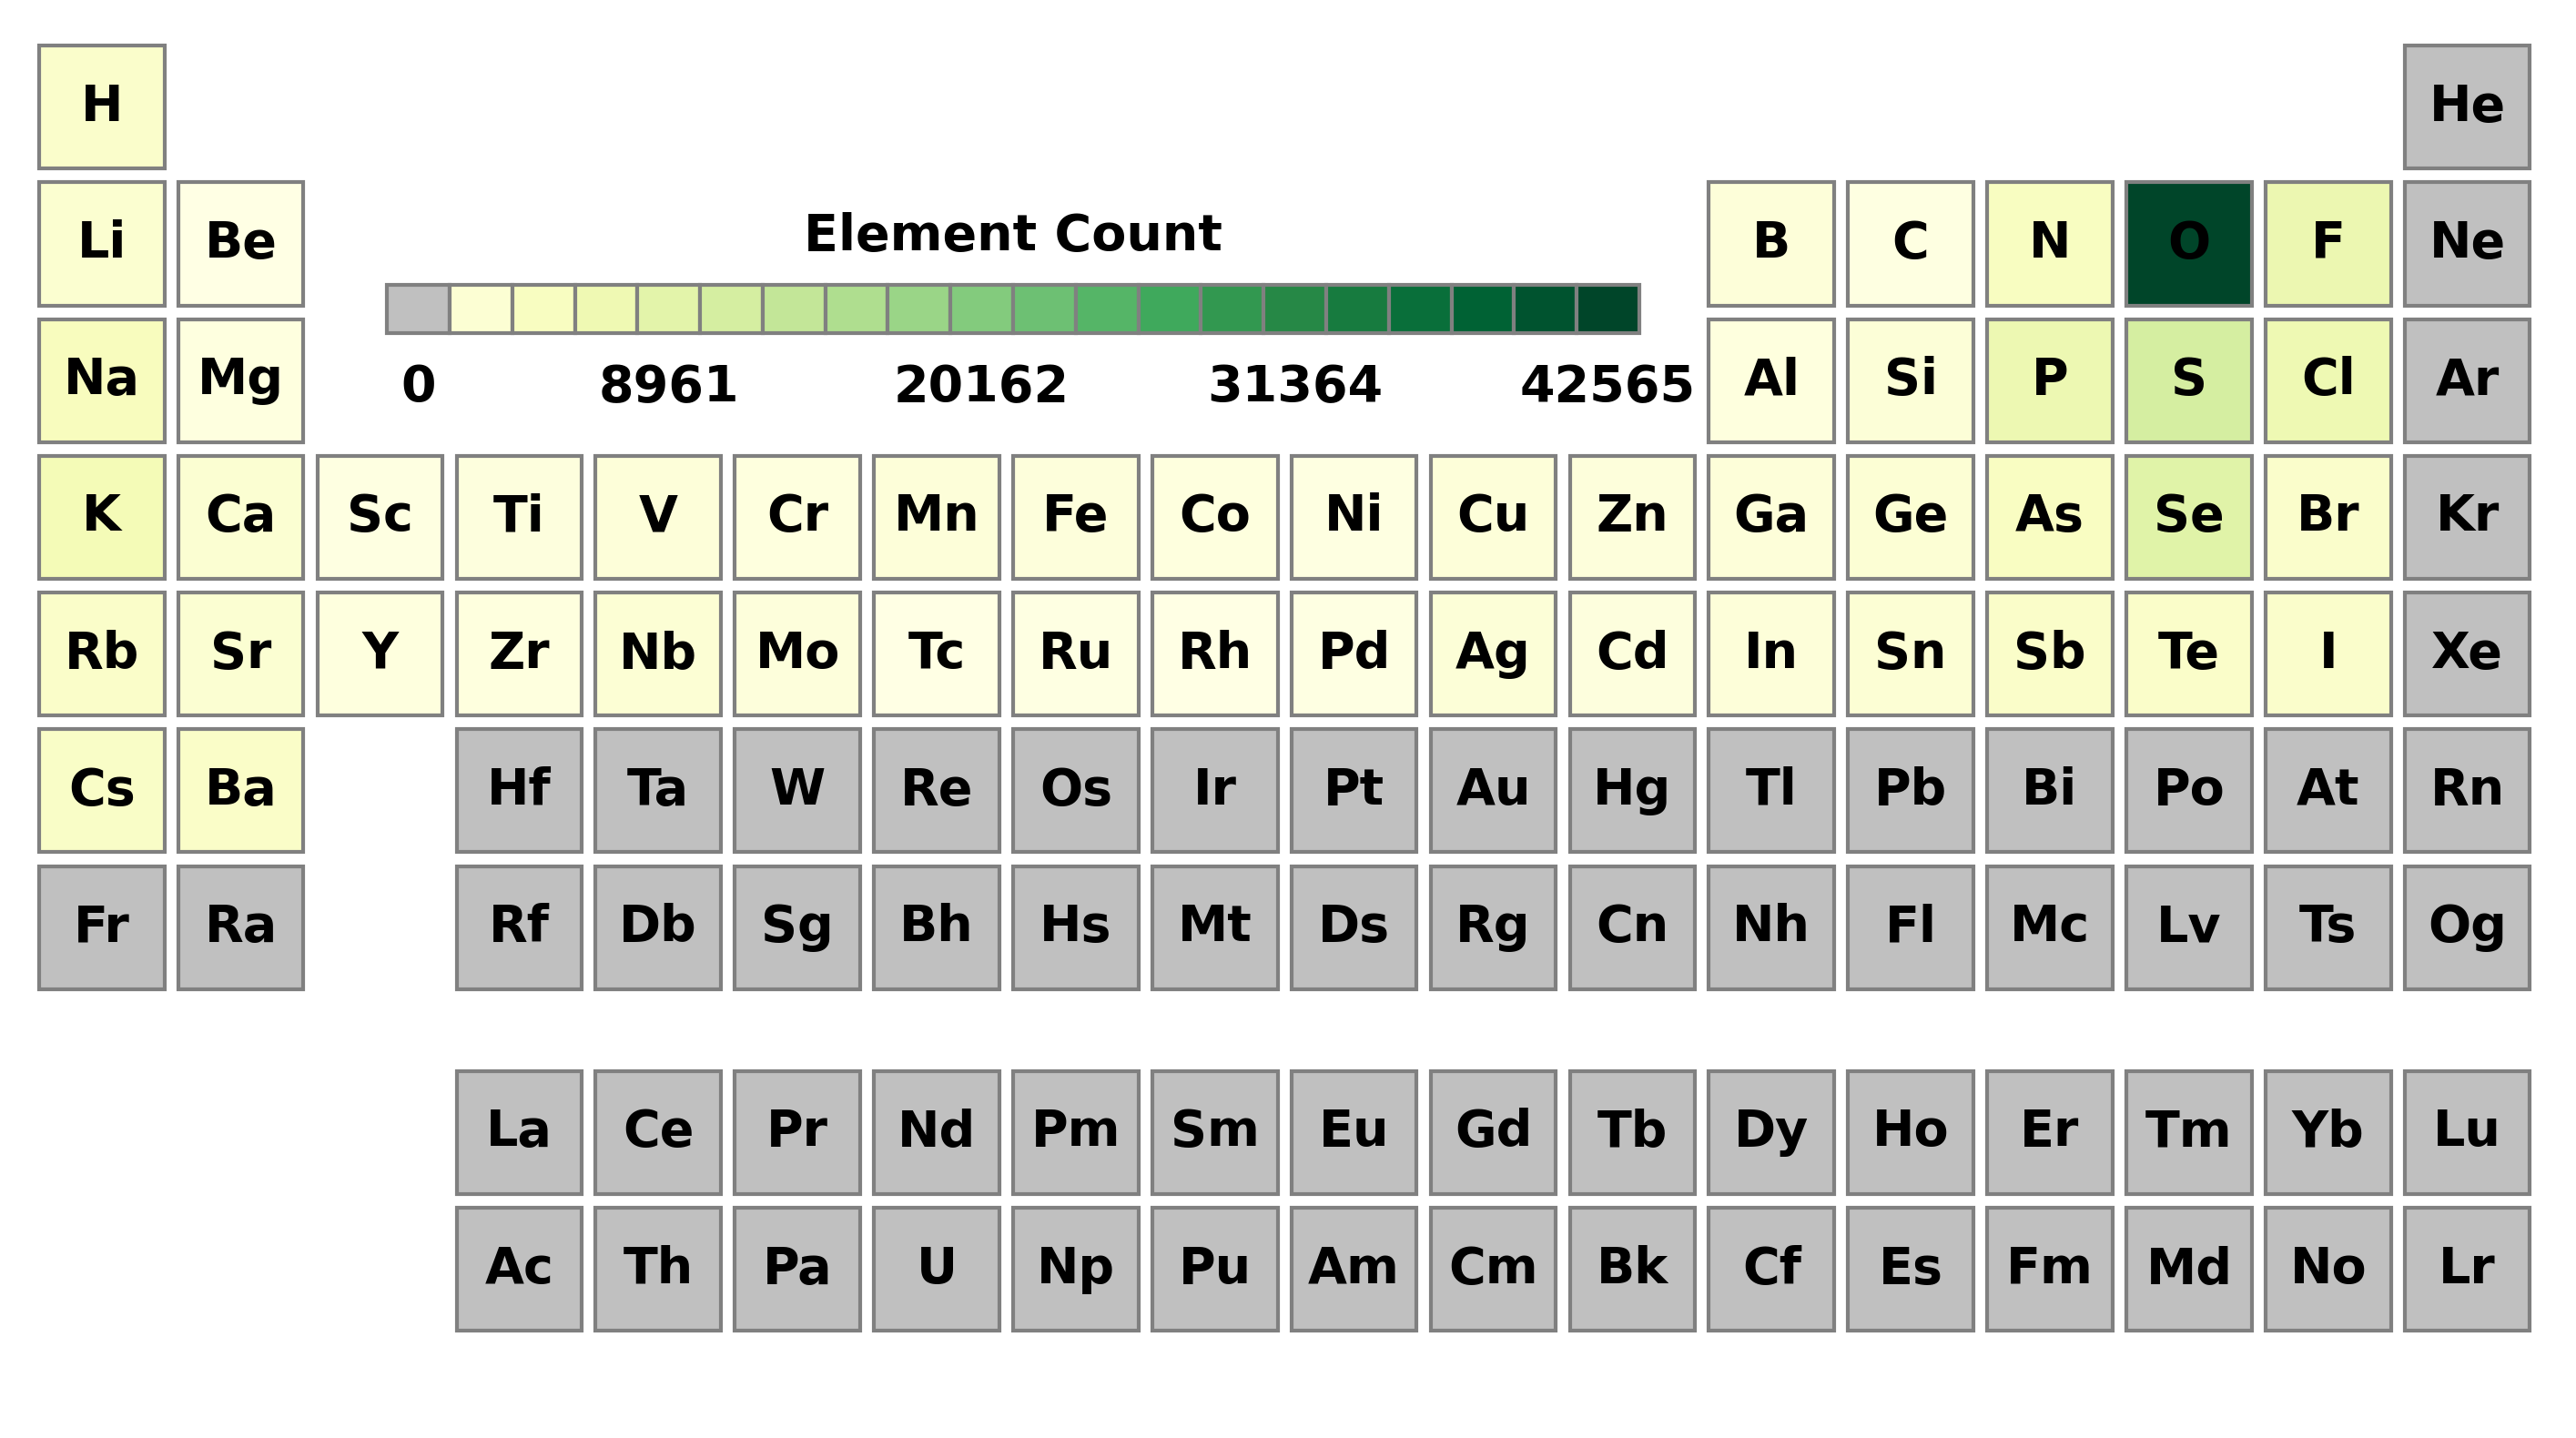

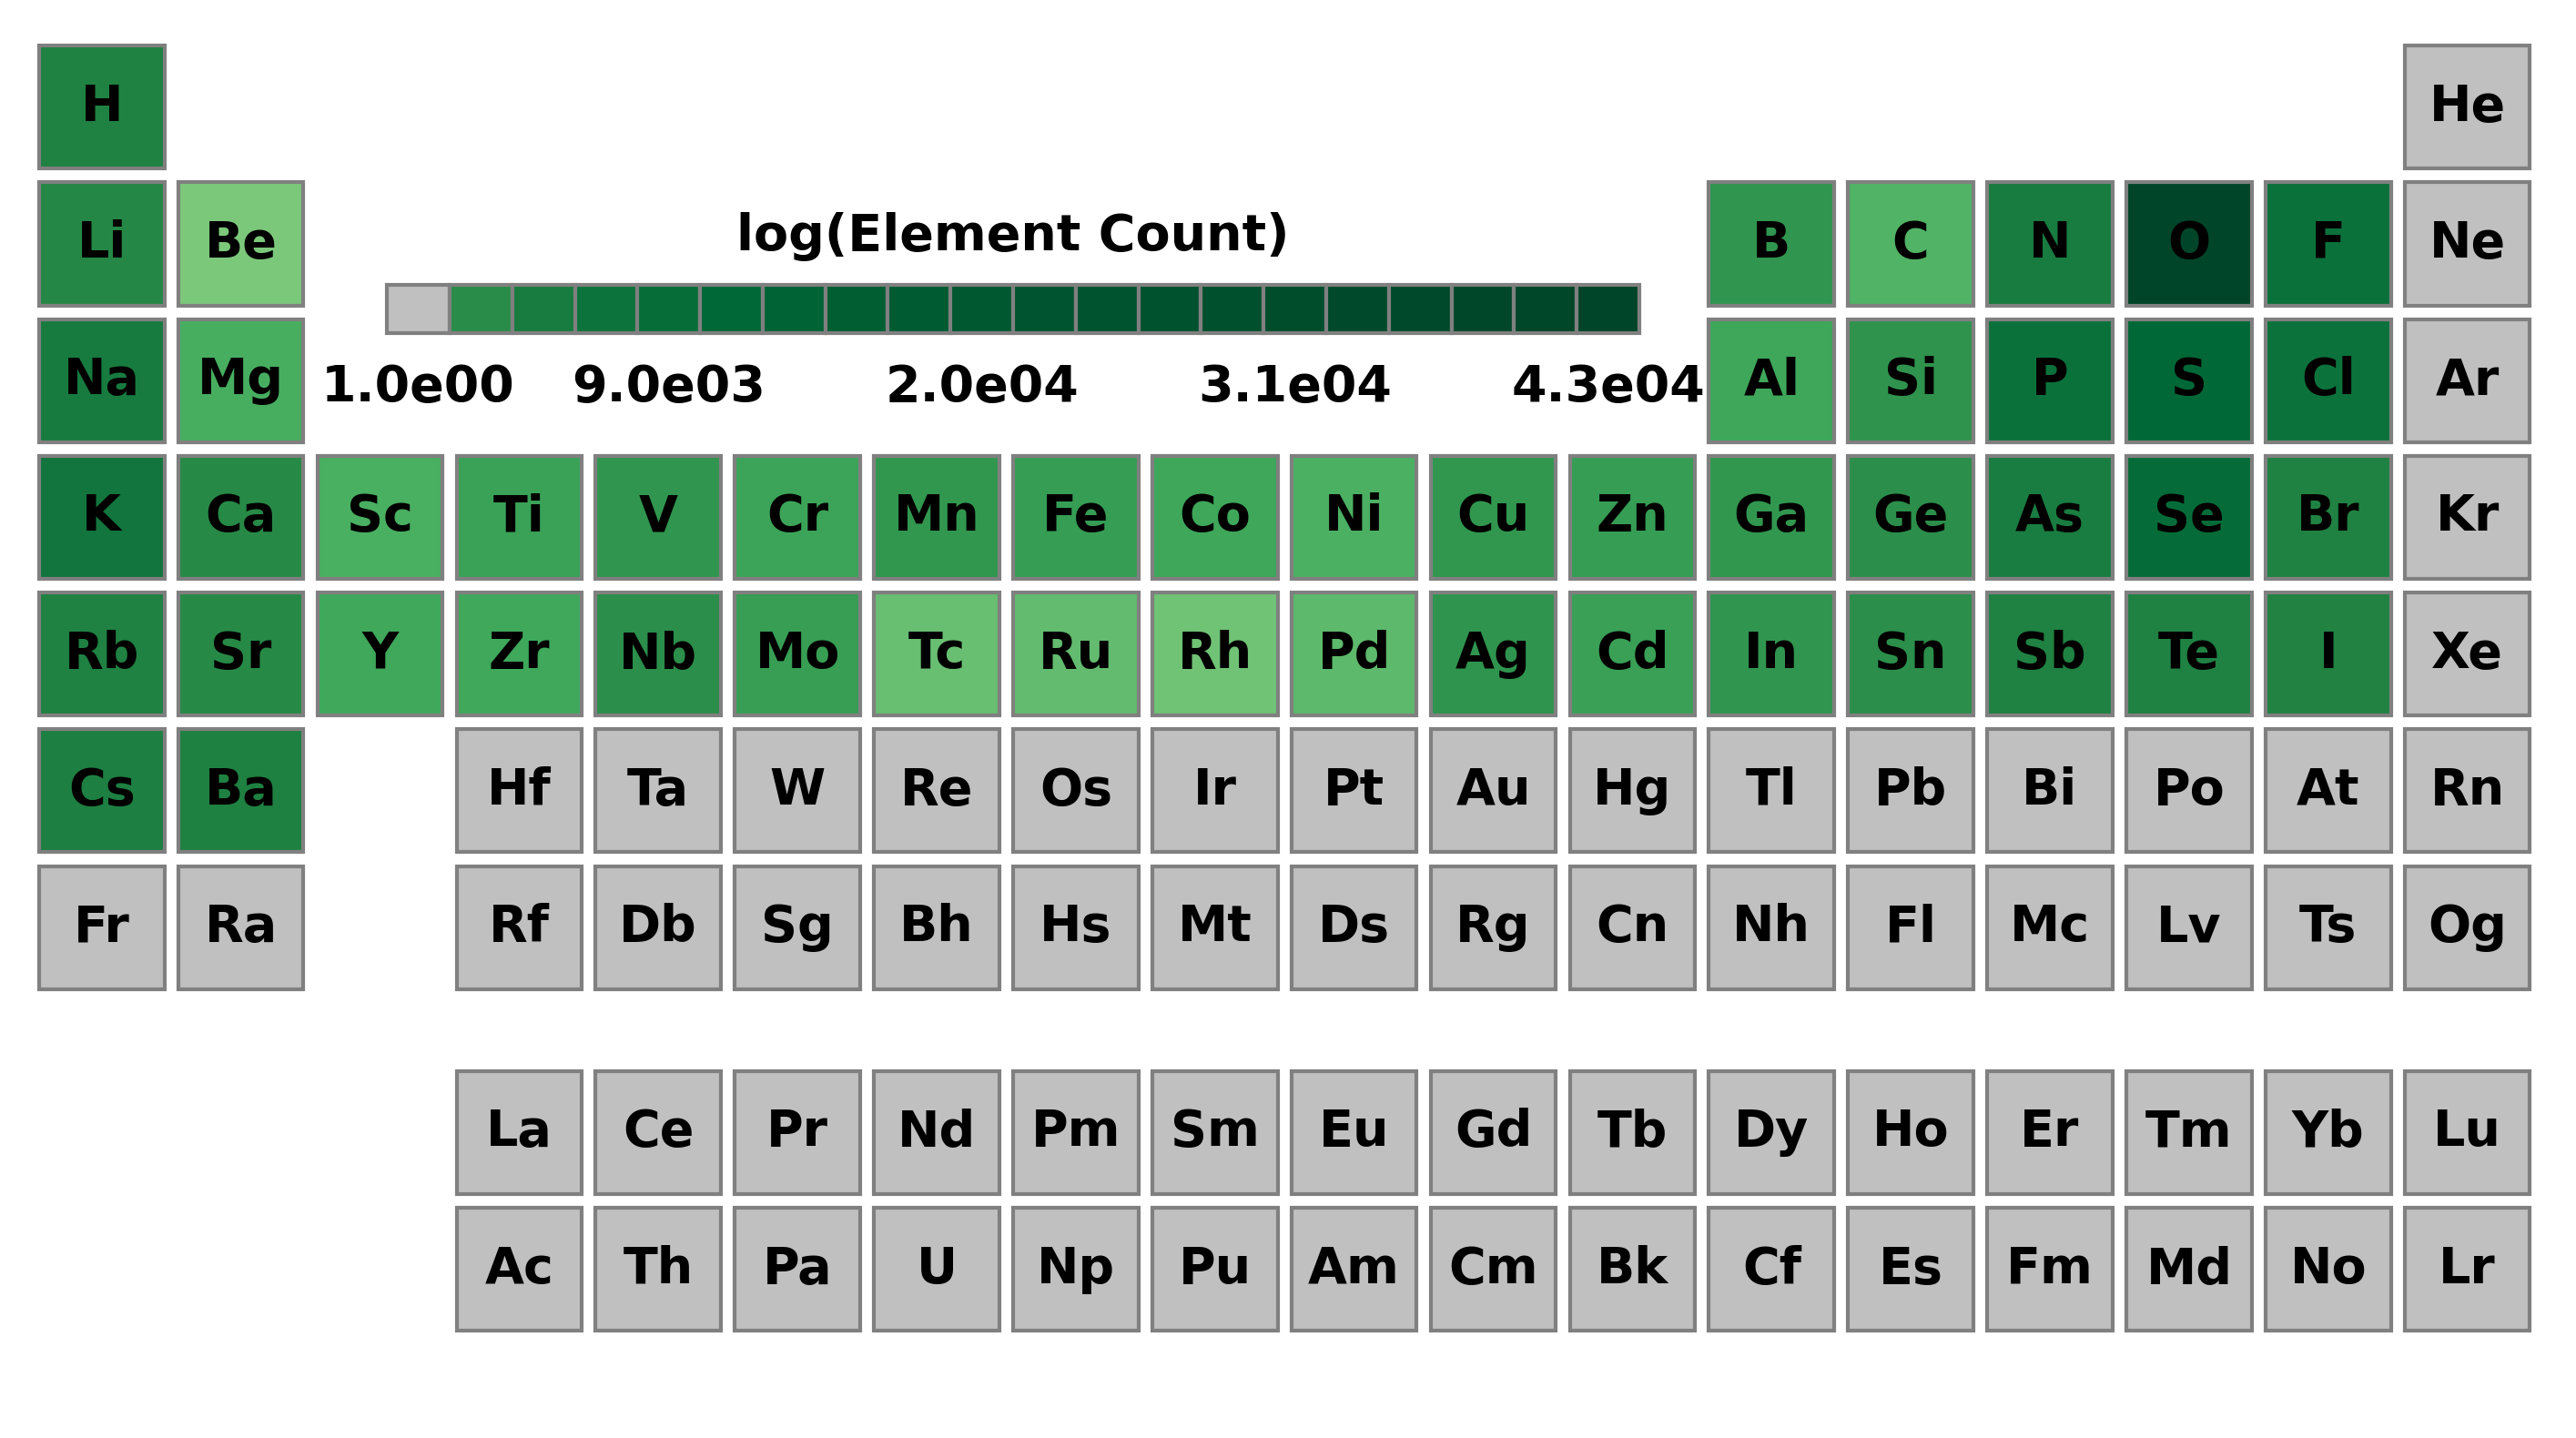

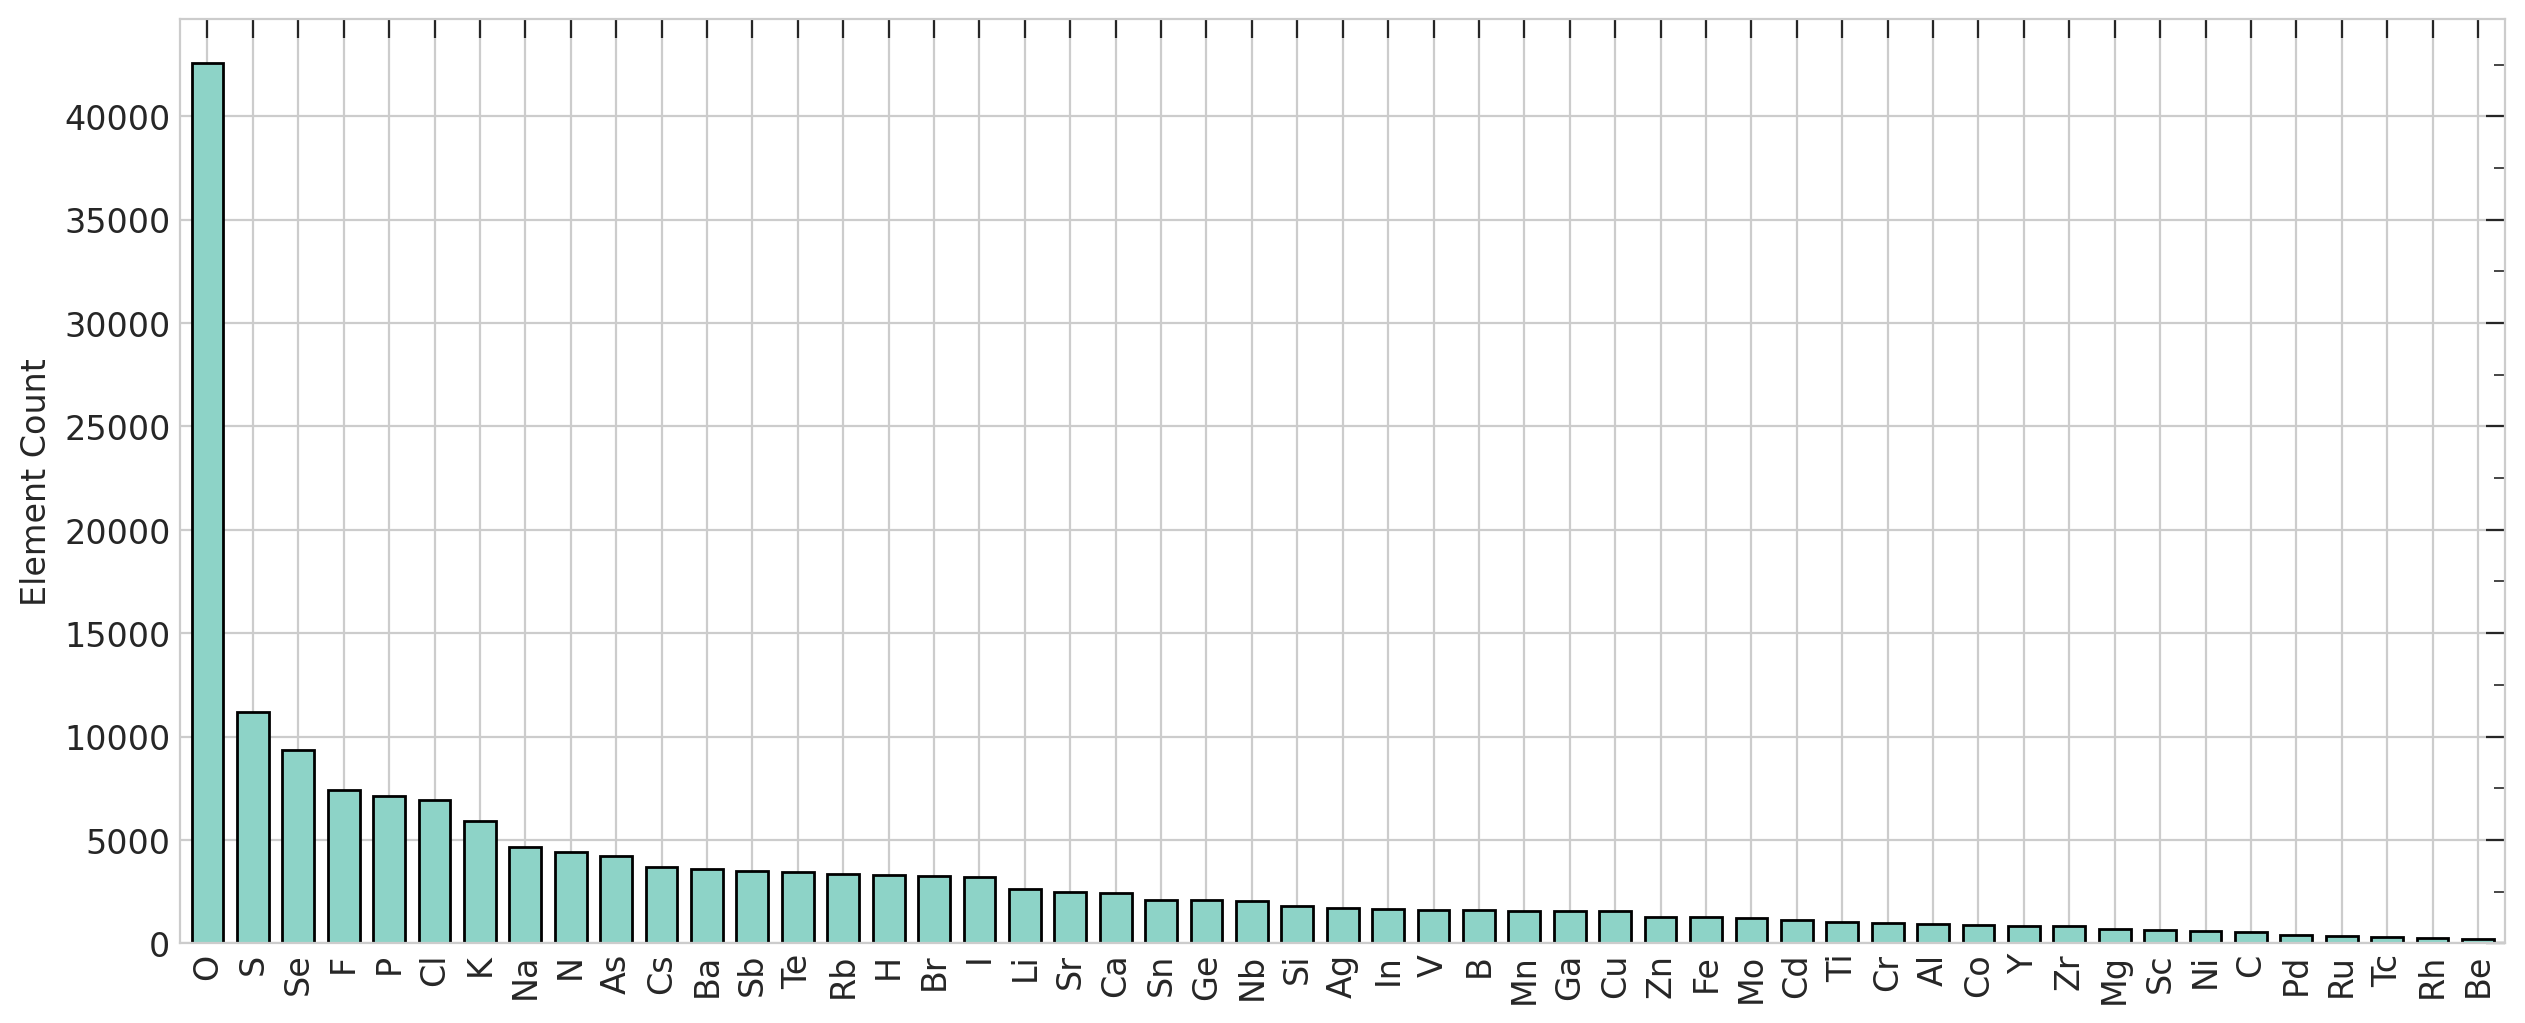

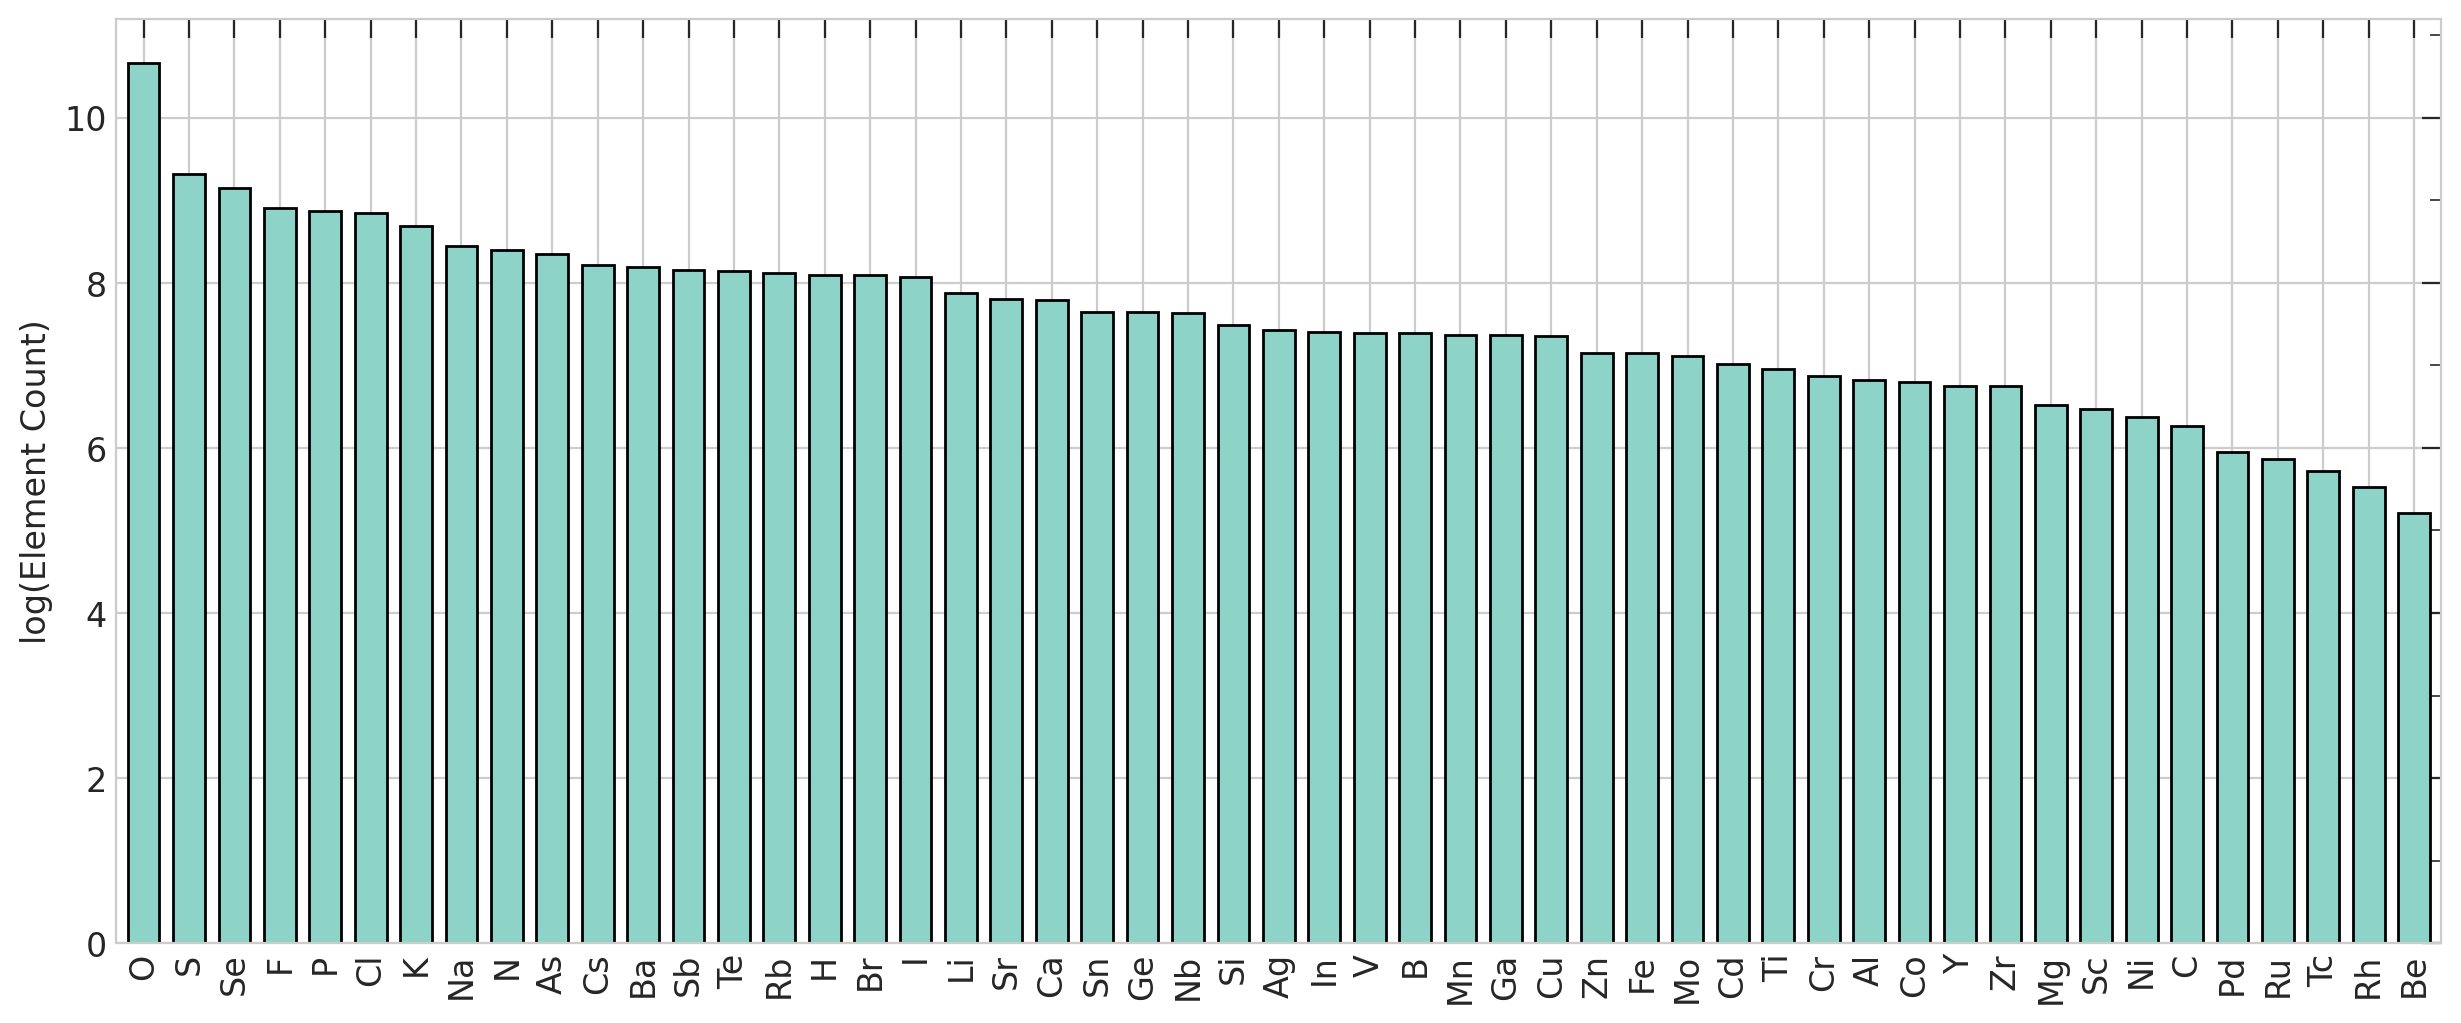

In [83]:
# Visualizing elemental prevalence in the dataset
import sys
from Utools.ML_figures.figures import element_prevalence
# To import the custom module from a specific path
sys.path.insert(0, os.path.join(current_dir))
formula = mp_trans_df.iloc[:, 0]

save_dir = os.path.join(current_dir, './figures/element_prevalence/used_data/mp')
os.makedirs(save_dir, exist_ok=True)

os.chdir(os.path.join(current_dir, './Utools'))
element_prevalence(formula,
                   name='element_prevalence_ptable',
                   save_dir=save_dir,
                   log_scale=False)
element_prevalence(formula,
                   name='log_element_prevalence_ptable',
                   save_dir=save_dir,
                   log_scale=True)

plt.rcParams.update({'font.size': 12})
element_prevalence(formula,
                   name='element_prevalence',
                   save_dir=save_dir,
                   ptable_fig=False,
                   log_scale=False)
element_prevalence(formula,
                   name='log_element_prevalence',
                   save_dir=save_dir,
                   ptable_fig=False,
                   log_scale=True)
os.chdir(current_dir)

In [84]:
# Create the directory if it doesn't exist
distribution_save_dir = os.path.join(current_dir, 'figures', 'data_distribution', 'used_data', 'mp')
os.makedirs(distribution_save_dir, exist_ok=True)

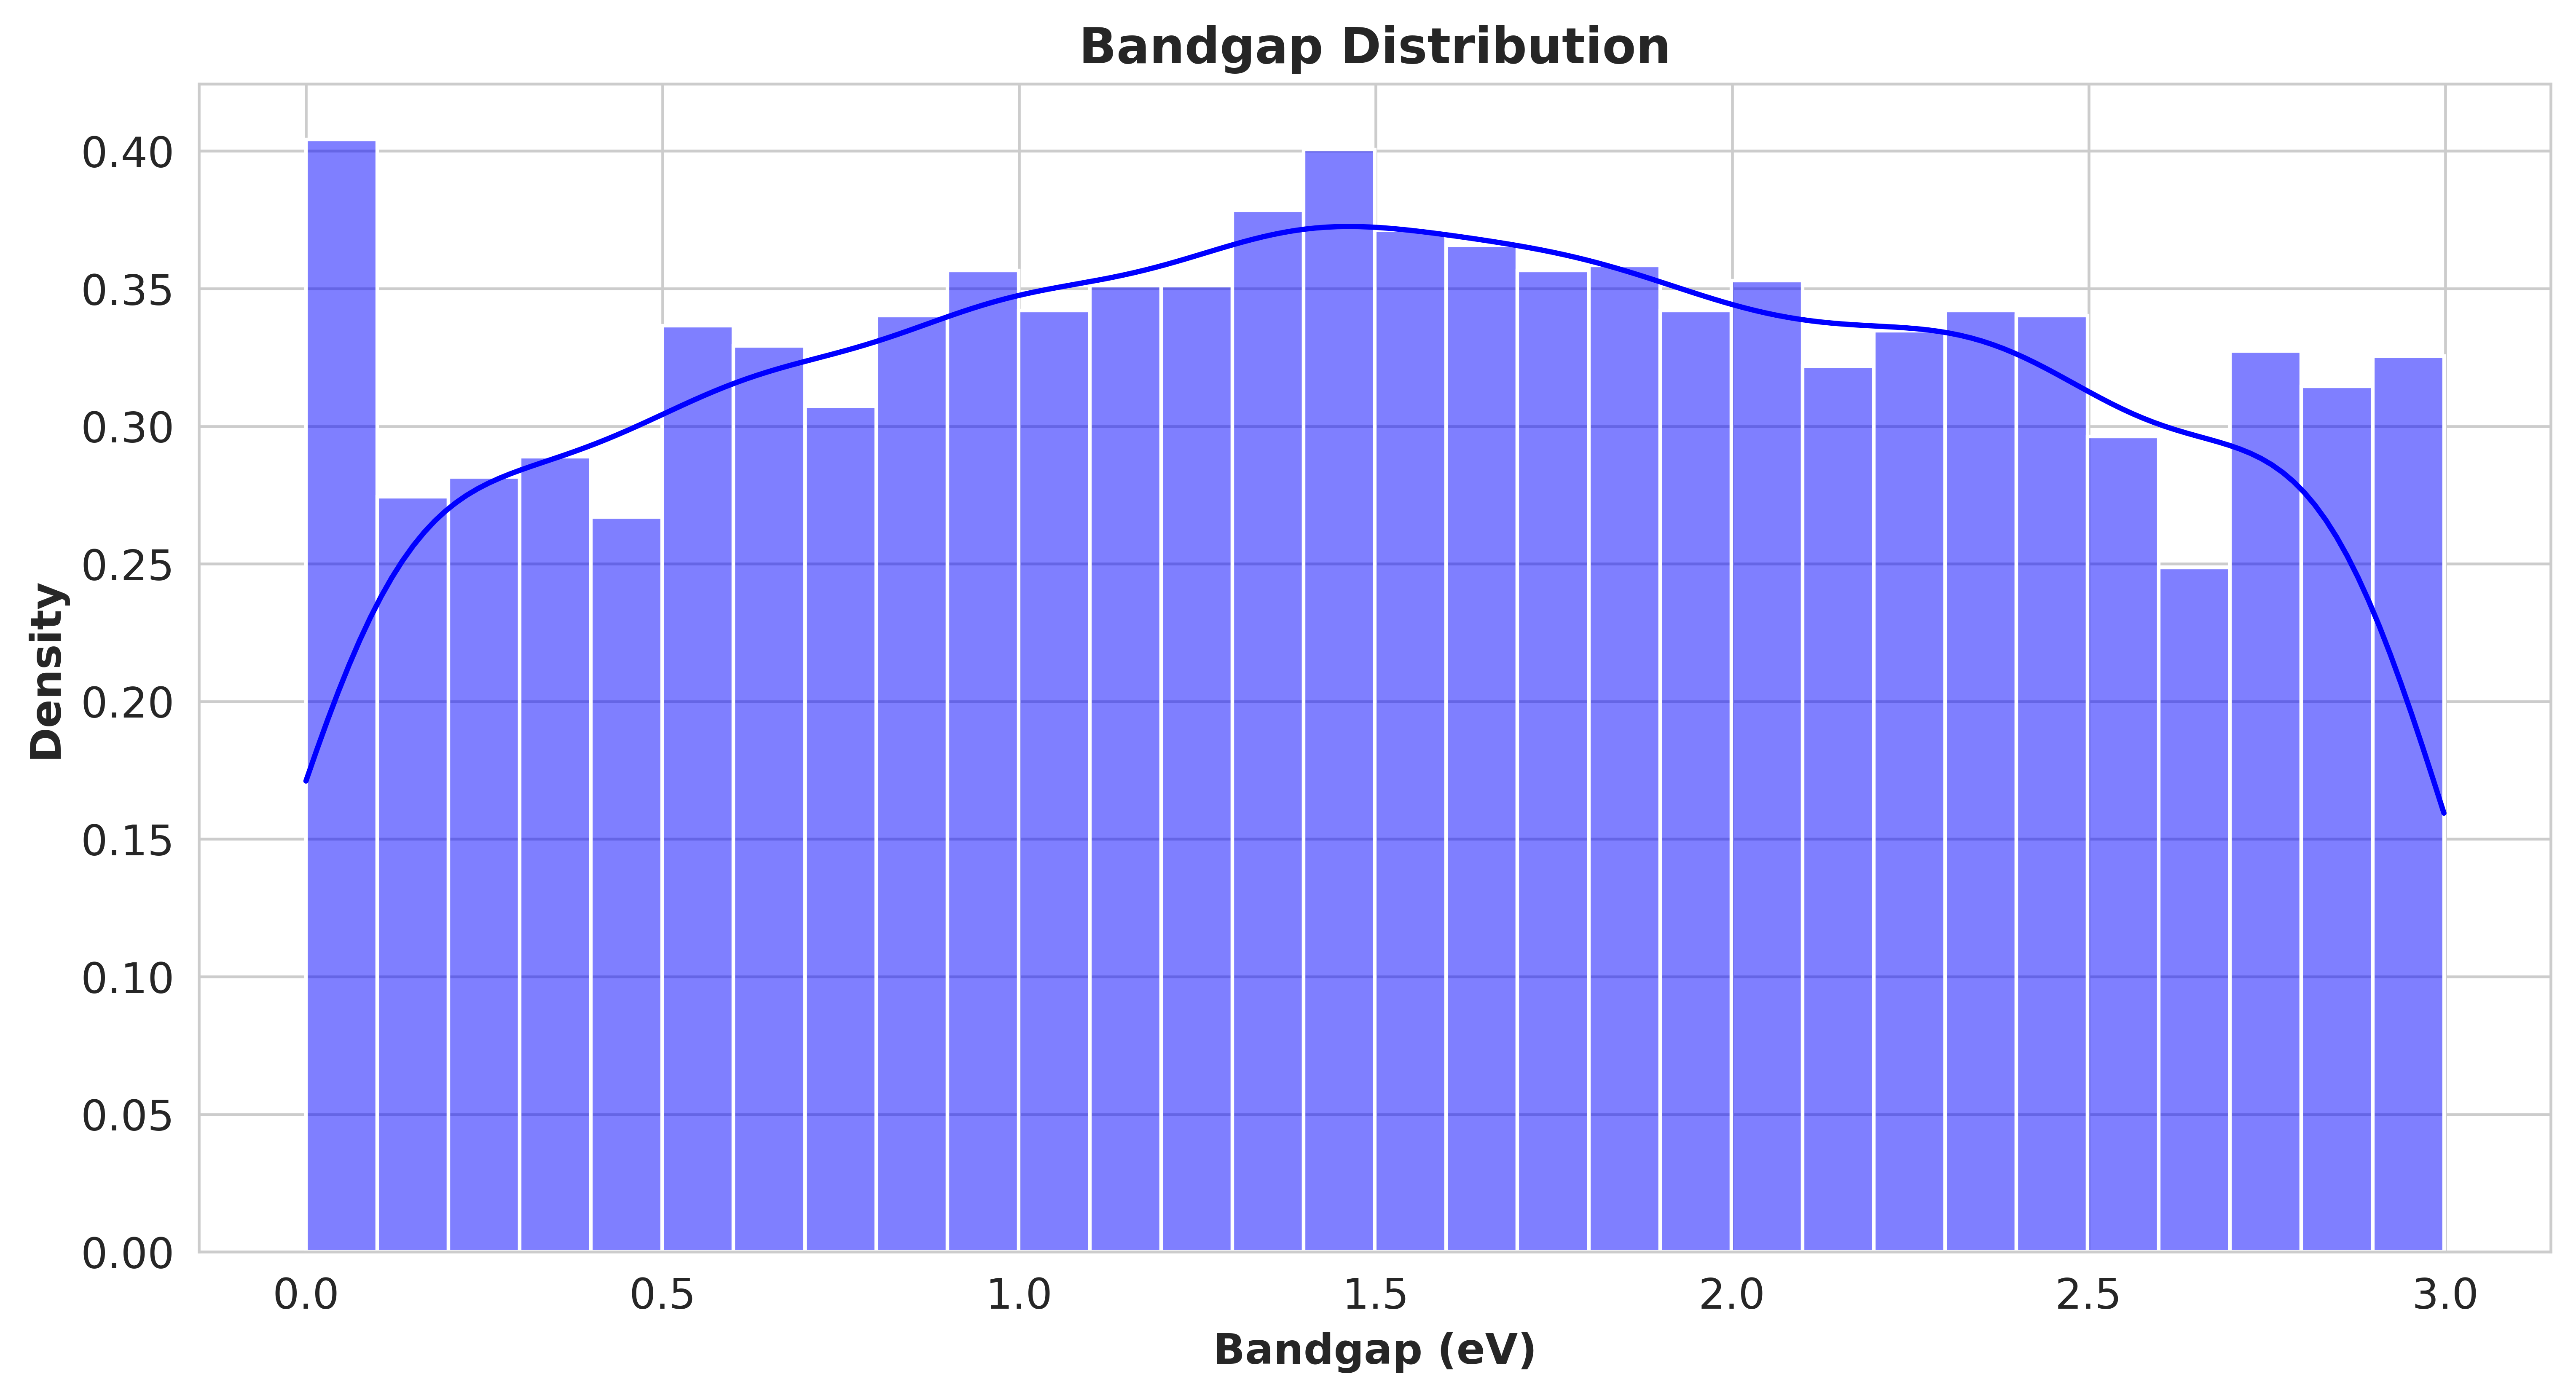

In [85]:
# draw a distribution plot of the bandgap

plt.figure(figsize=(12, 6), dpi=300)
sns.set_style("whitegrid")
sns.set_palette("Set3")  # Set3, RdBu
sns.histplot(mp_trans_df['band_gap'], kde=True, bins=30, color='blue', stat='density')
plt.title("Bandgap Distribution", fontsize=14, weight="bold")
plt.xlabel("Bandgap (eV)", fontsize=12, weight="bold")
plt.ylabel("Density", fontsize=12, weight="bold")

# save the figure
plt.savefig(os.path.join(distribution_save_dir, 'bandgap_distribution.png'), dpi=300)
plt.show()

In [86]:
# 查看数据中氧化物和非氧化物的带隙分布情况
oxides_df = mp_trans_df[mp_trans_df['composition'].str.contains('O')]
non_oxides_df = mp_trans_df[~mp_trans_df['composition'].str.contains('O')]

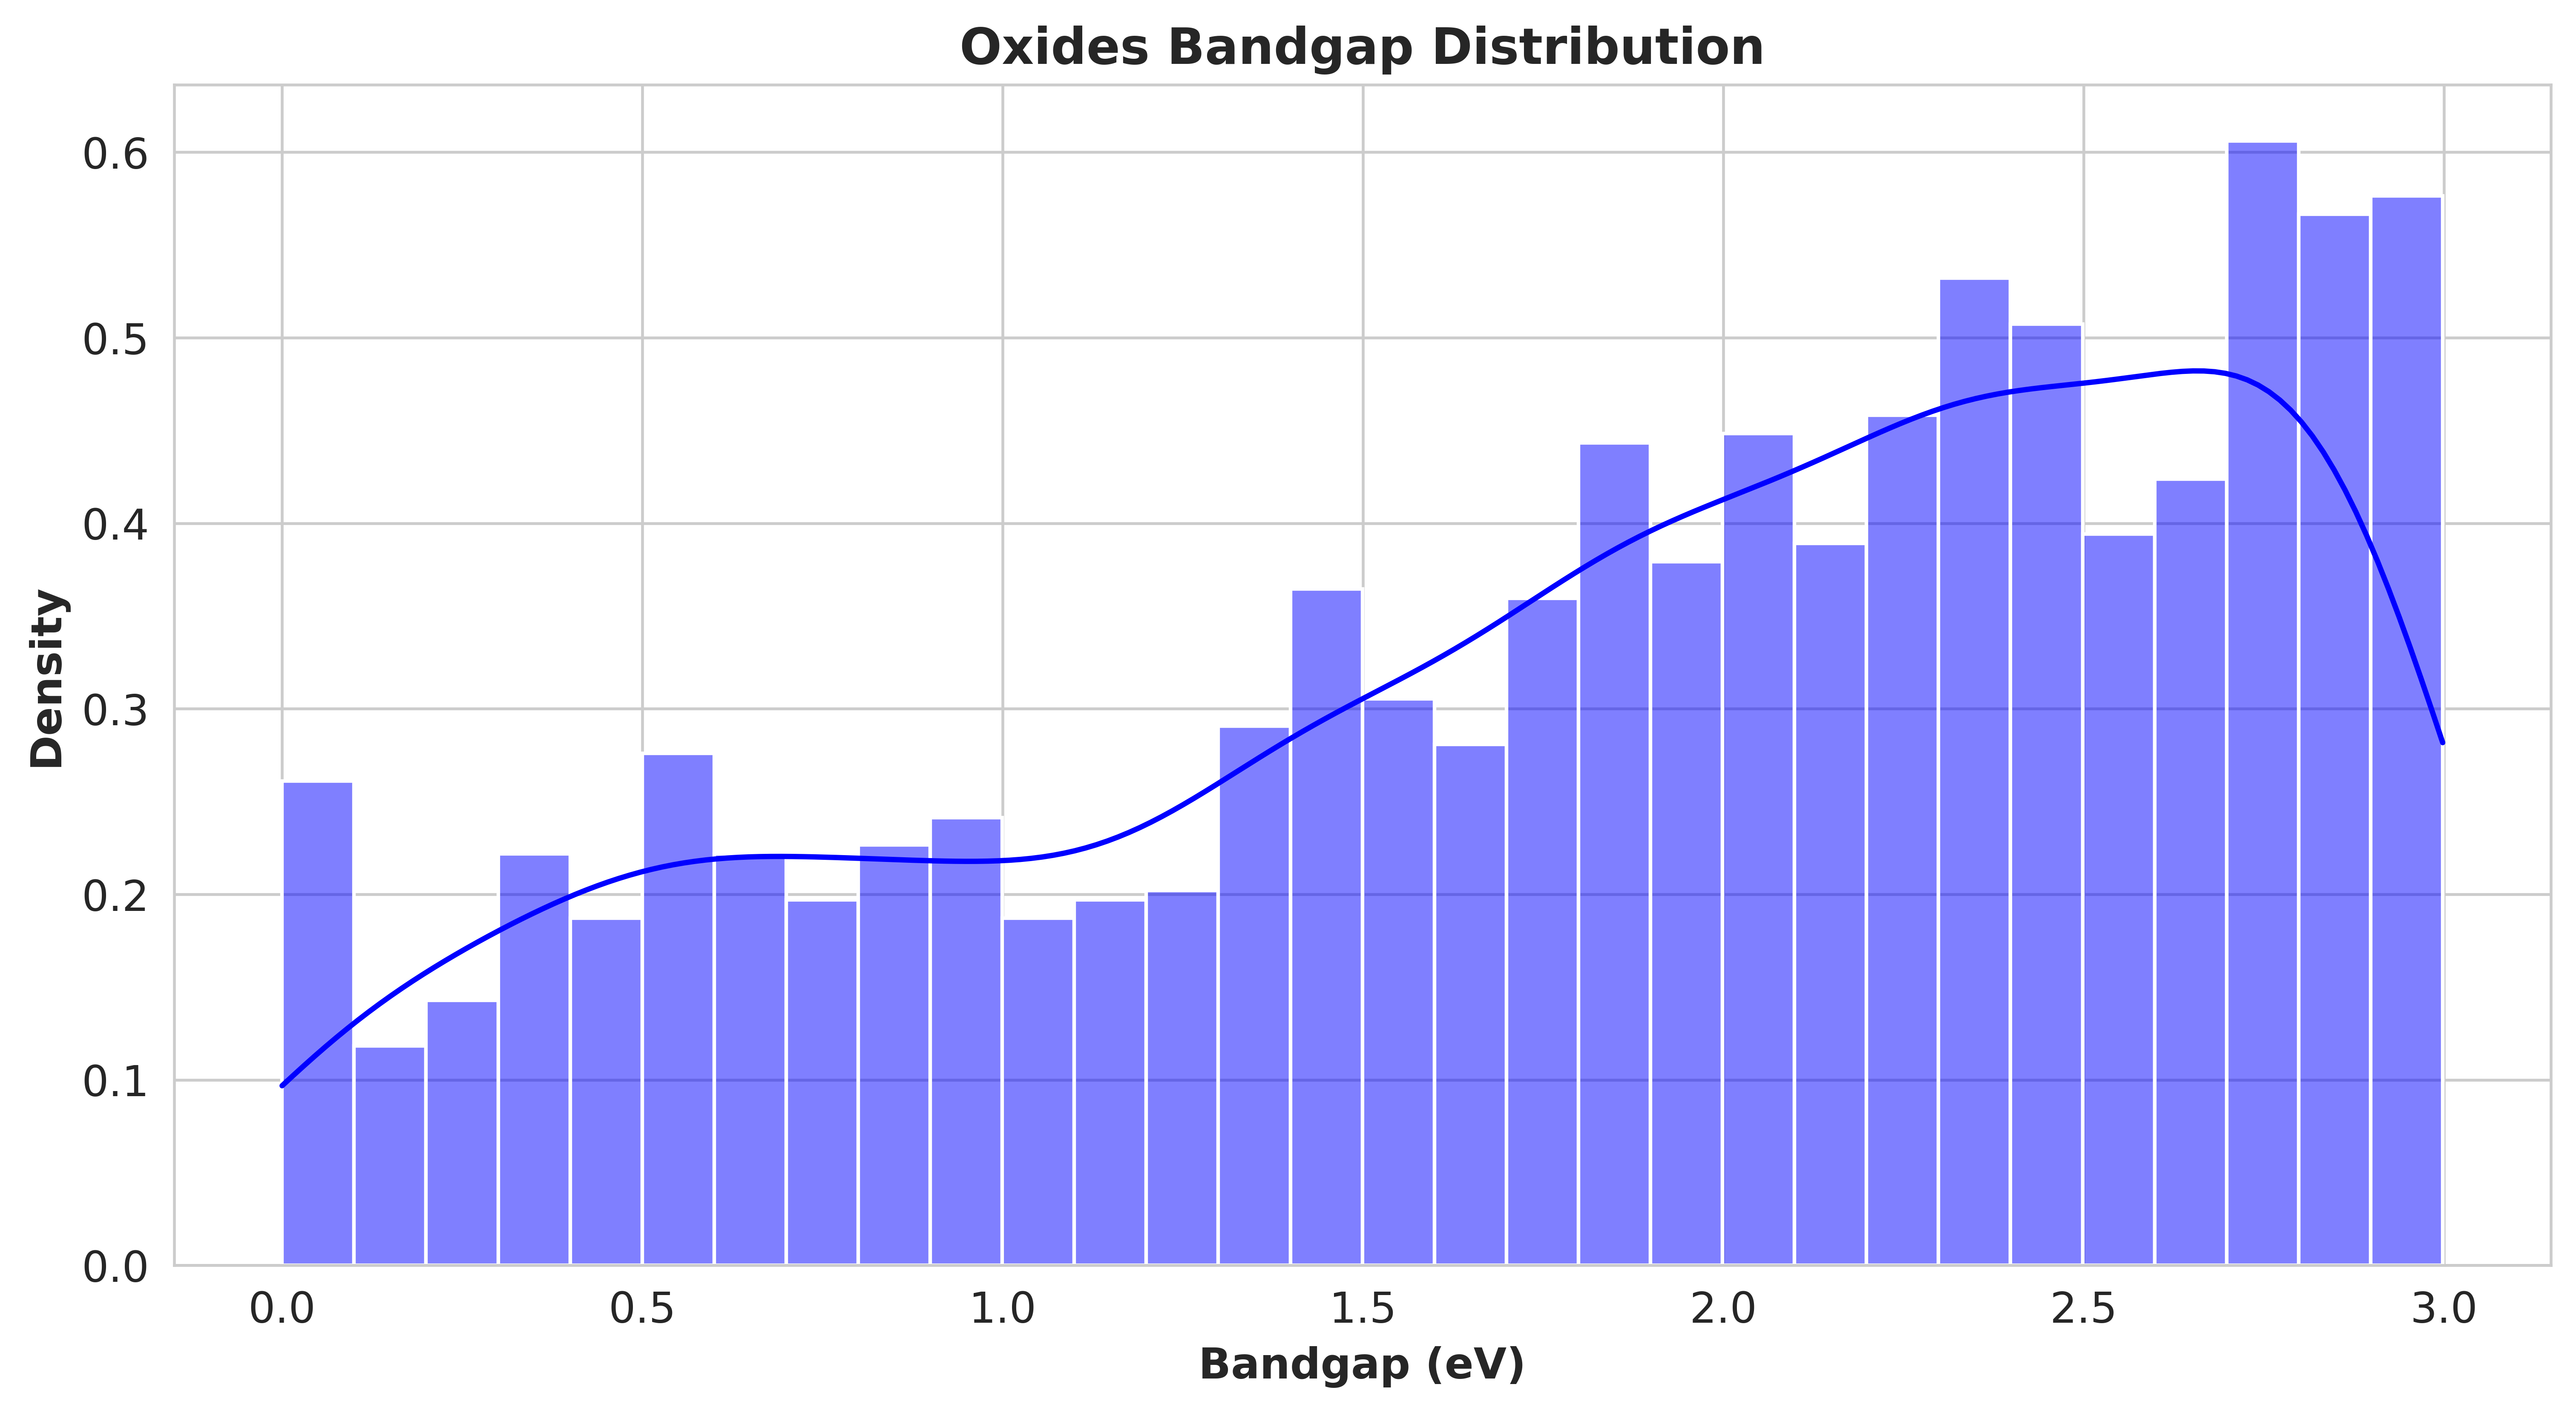

In [87]:
# draw a distribution plot of the oxides bandgap

plt.figure(figsize=(12, 6), dpi=300)
sns.set_style("whitegrid")
sns.set_palette("Set3")  # Set3, RdBu
sns.histplot(oxides_df['band_gap'], kde=True, bins=30, color='blue', stat='density')
plt.title("Oxides Bandgap Distribution", fontsize=14, weight="bold")
plt.xlabel("Bandgap (eV)", fontsize=12, weight="bold")
plt.ylabel("Density", fontsize=12, weight="bold")

# save the figure
plt.savefig(os.path.join(distribution_save_dir, 'oxides_bandgap_distribution.png'), dpi=300)
plt.show()

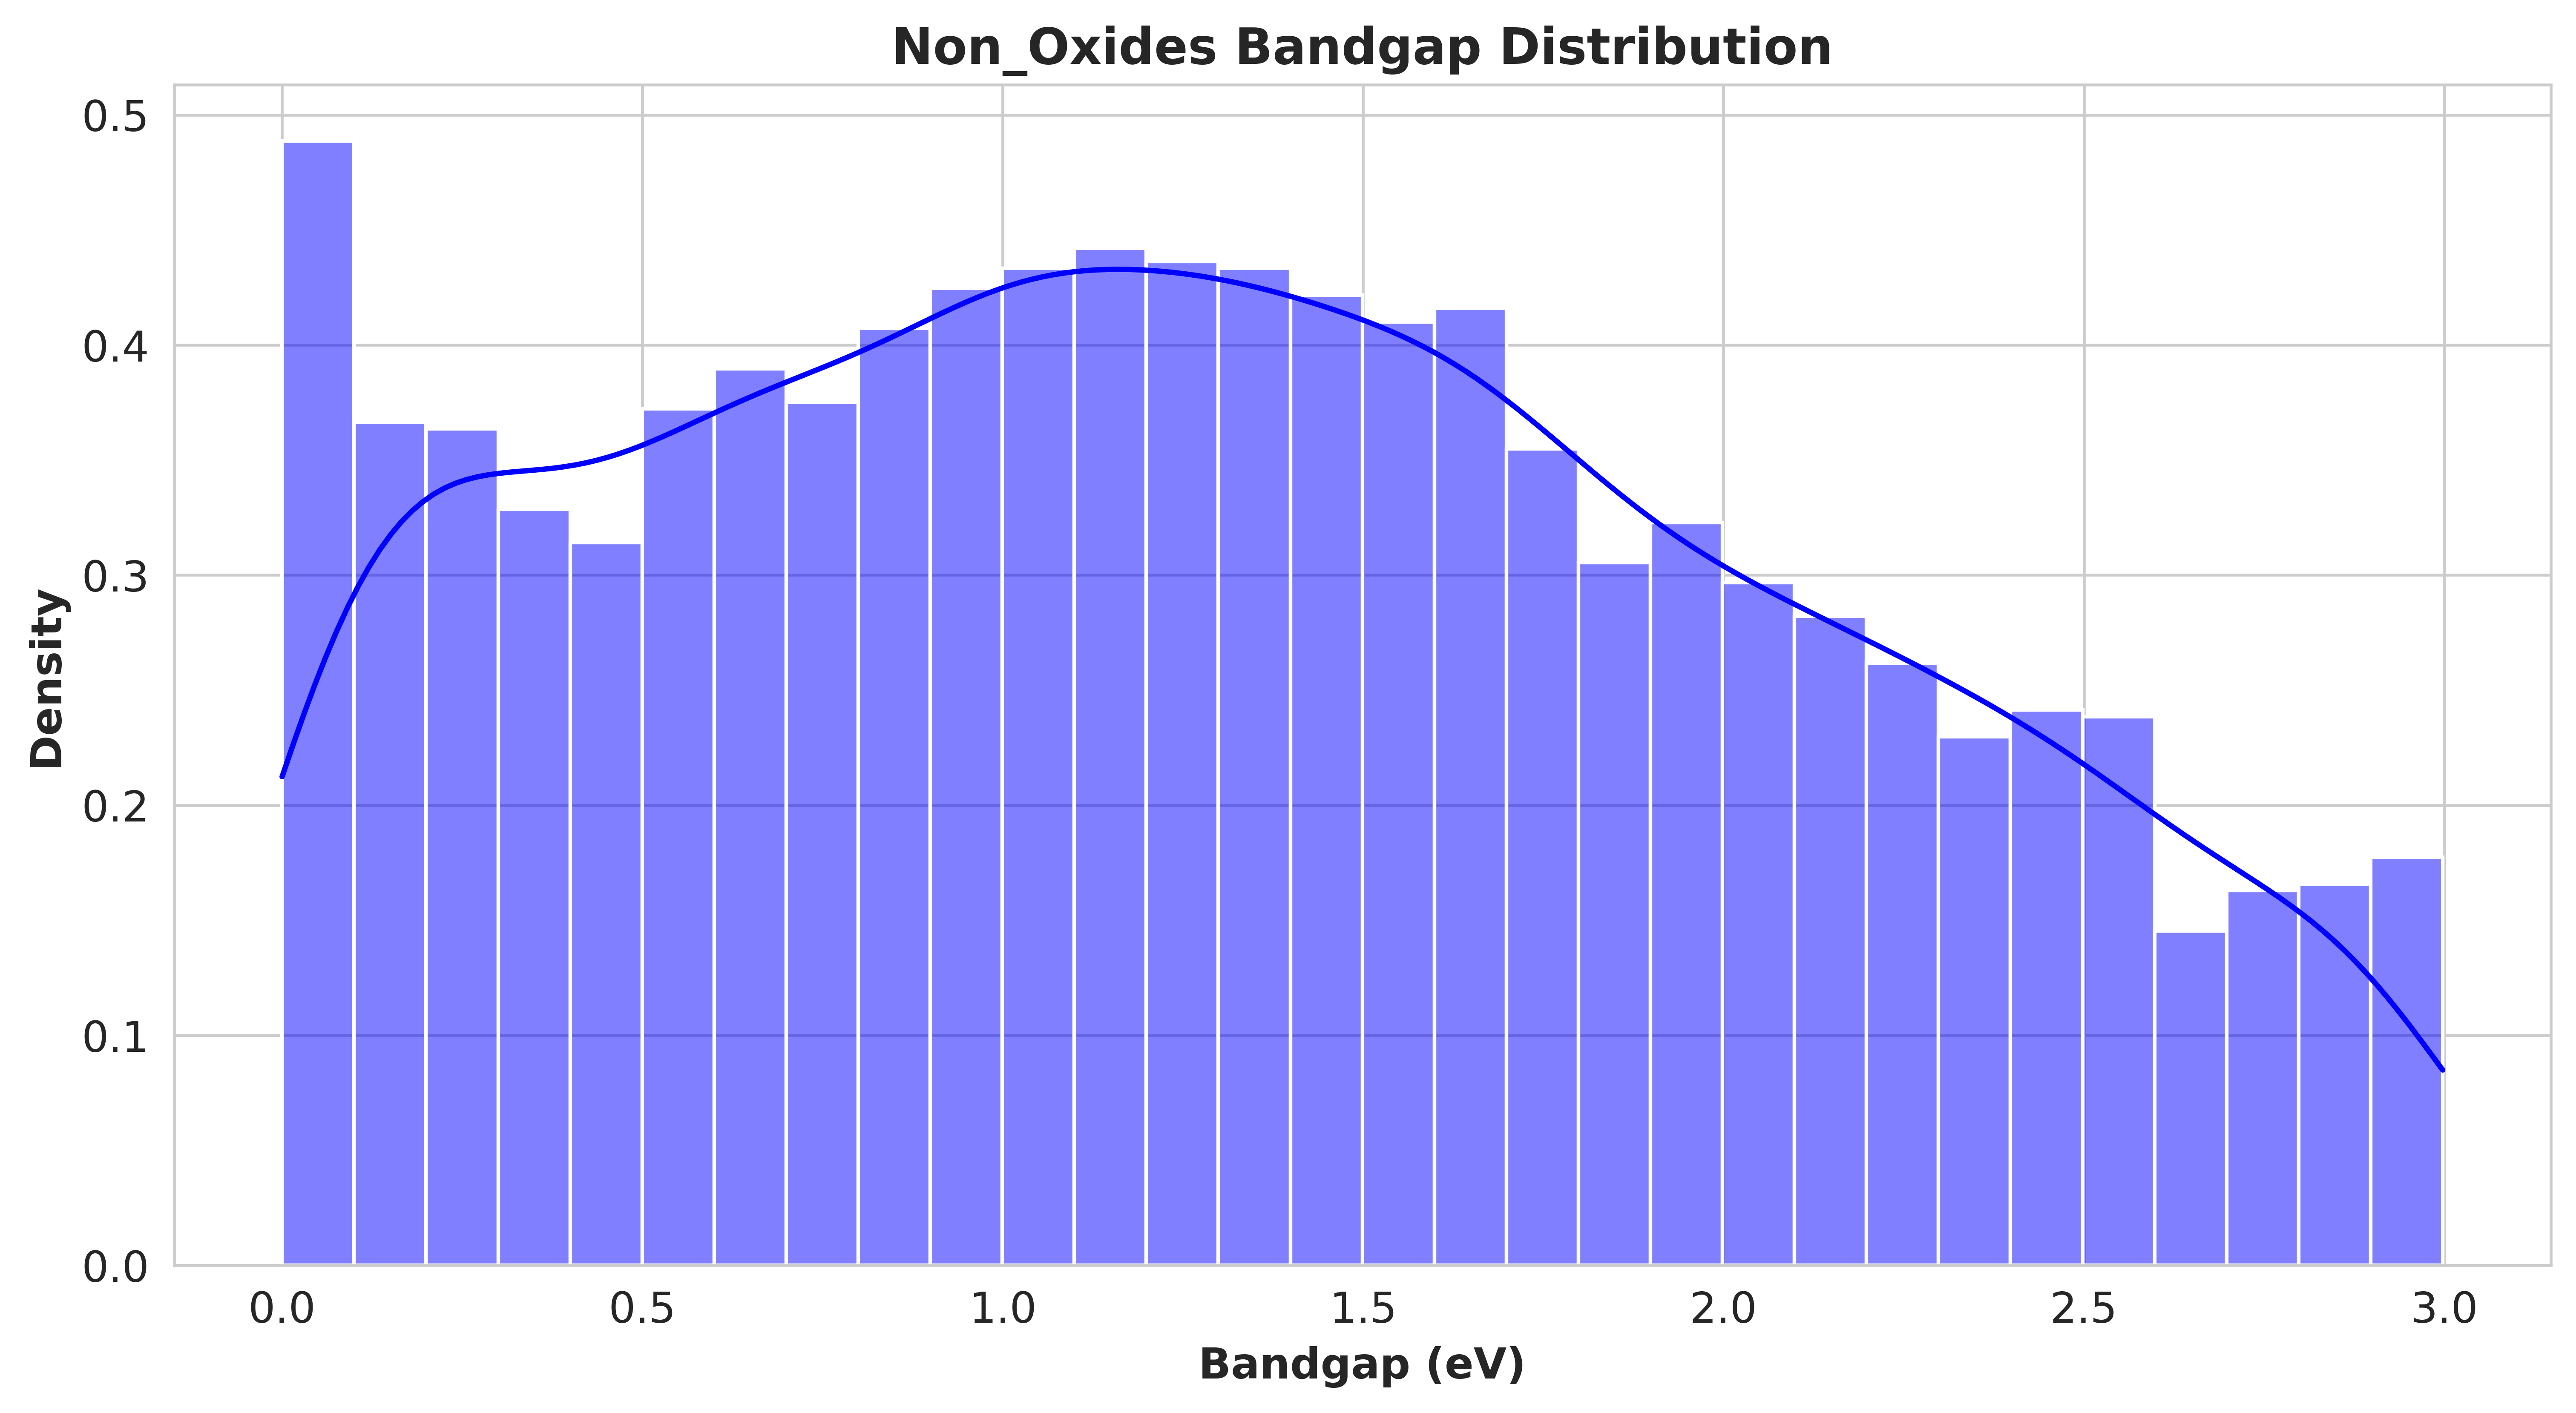

In [88]:
# draw a distribution plot of the non_oxides bandgap

plt.figure(figsize=(12, 6), dpi=300)
sns.set_style("whitegrid")
sns.set_palette("Set3")  # Set3, RdBu
sns.histplot(non_oxides_df['band_gap'], kde=True, bins=30, color='blue', stat='density')
plt.title("Non_Oxides Bandgap Distribution", fontsize=14, weight="bold")
plt.xlabel("Bandgap (eV)", fontsize=12, weight="bold")
plt.ylabel("Density", fontsize=12, weight="bold")

# save the figure
plt.savefig(os.path.join(distribution_save_dir, 'non_oxides_bandgap_distribution.png'), dpi=300)
plt.show()

## Experimental data

In [89]:
# read the data from the csv file
file_path = os.path.join(current_dir, './Data/Ya Zhuo et data.csv')
exp_df = pd.read_csv(file_path)
exp_df.rename(columns={'Eg (eV)': 'band_gap'}, inplace=True)
exp_df.head()

,composition,band_gap
0,Hg0.7Cd0.3Te,0.35
1,CuBr,3.08
2,LuP,1.30
3,Cu3SbSe4,0.40
4,ZnO,3.44


In [90]:
exp_df.describe()

,band_gap
count,6354.000000
mean,1.252225
std,1.539961
min,0.000000
25%,0.000000
50%,0.710000
75%,2.130000
max,11.700000


In [91]:
# remove the mental data that the bandgap is 0eV, we only keep the semiconductors
exp_df = exp_df[exp_df['band_gap'] > 0]
# get rid of the data that the bandgap is greater than 3eV
exp_df = exp_df[exp_df['band_gap'] < 3]
exp_df.describe()

,band_gap
count,3130.000000
mean,1.480380
std,0.803089
min,0.020000
25%,0.800000
50%,1.500000
75%,2.167500
max,2.990000


In [92]:
exp_trans_df = stc.featurize_dataframe(exp_df, 'composition', ignore_errors=True)

StrToComposition: 100%|██████████| 3130/3130 [00:01<00:00, 2104.26it/s]


In [93]:
exp_trans_df['composition'] = exp_trans_df['composition_type']
exp_trans_df.drop(columns=['composition_type'], inplace=True)
exp_trans_df.head()

,composition,band_gap
0,"(Hg, Cd, Te)",0.35
2,"(Lu, P)",1.30
3,"(Cu, Sb, Se)",0.40
5,"(Pt, Sb)",0.08
6,"(Zn, In, S)",2.68


In [94]:
len(exp_trans_df['composition'].unique())

1967

### 去除不需要的元素

In [95]:
# 查看exp_df中是否有重金属元素和稀土元素
exp_trans_df[exp_trans_df['composition'].apply(lambda x: any(elem in exclude_elements for elem in x.elements))].shape

(1200, 2)

In [96]:
# 过滤掉包含重金属元素和稀土元素的材料
exp_trans_df = exp_trans_df[~exp_trans_df['composition'].apply(lambda x: any(elem in exclude_elements for elem in x.elements))]
exp_trans_df.shape

(1930, 2)

In [97]:
# 查看exp_df中是否有稀有气体元素
exp_trans_df[exp_trans_df['composition'].apply(lambda x: any(elem in noble_gas_elements for elem in x.elements))].shape

(0, 2)

- 实验数据中不存在稀有气体元素，对此，我们在MP数据中也不考虑稀有气体元素

In [106]:
exp_trans_df['composition'] = exp_trans_df['composition'].apply(lambda x: str(x).replace(" ", ""))
exp_trans_df.head()
# Save the data of composition and band_gap to a csv file
file_path = os.path.join(current_dir, './Data/composition_data/exp_band_gap.csv')
exp_trans_df.to_csv(file_path, index=False)

### 数据分布

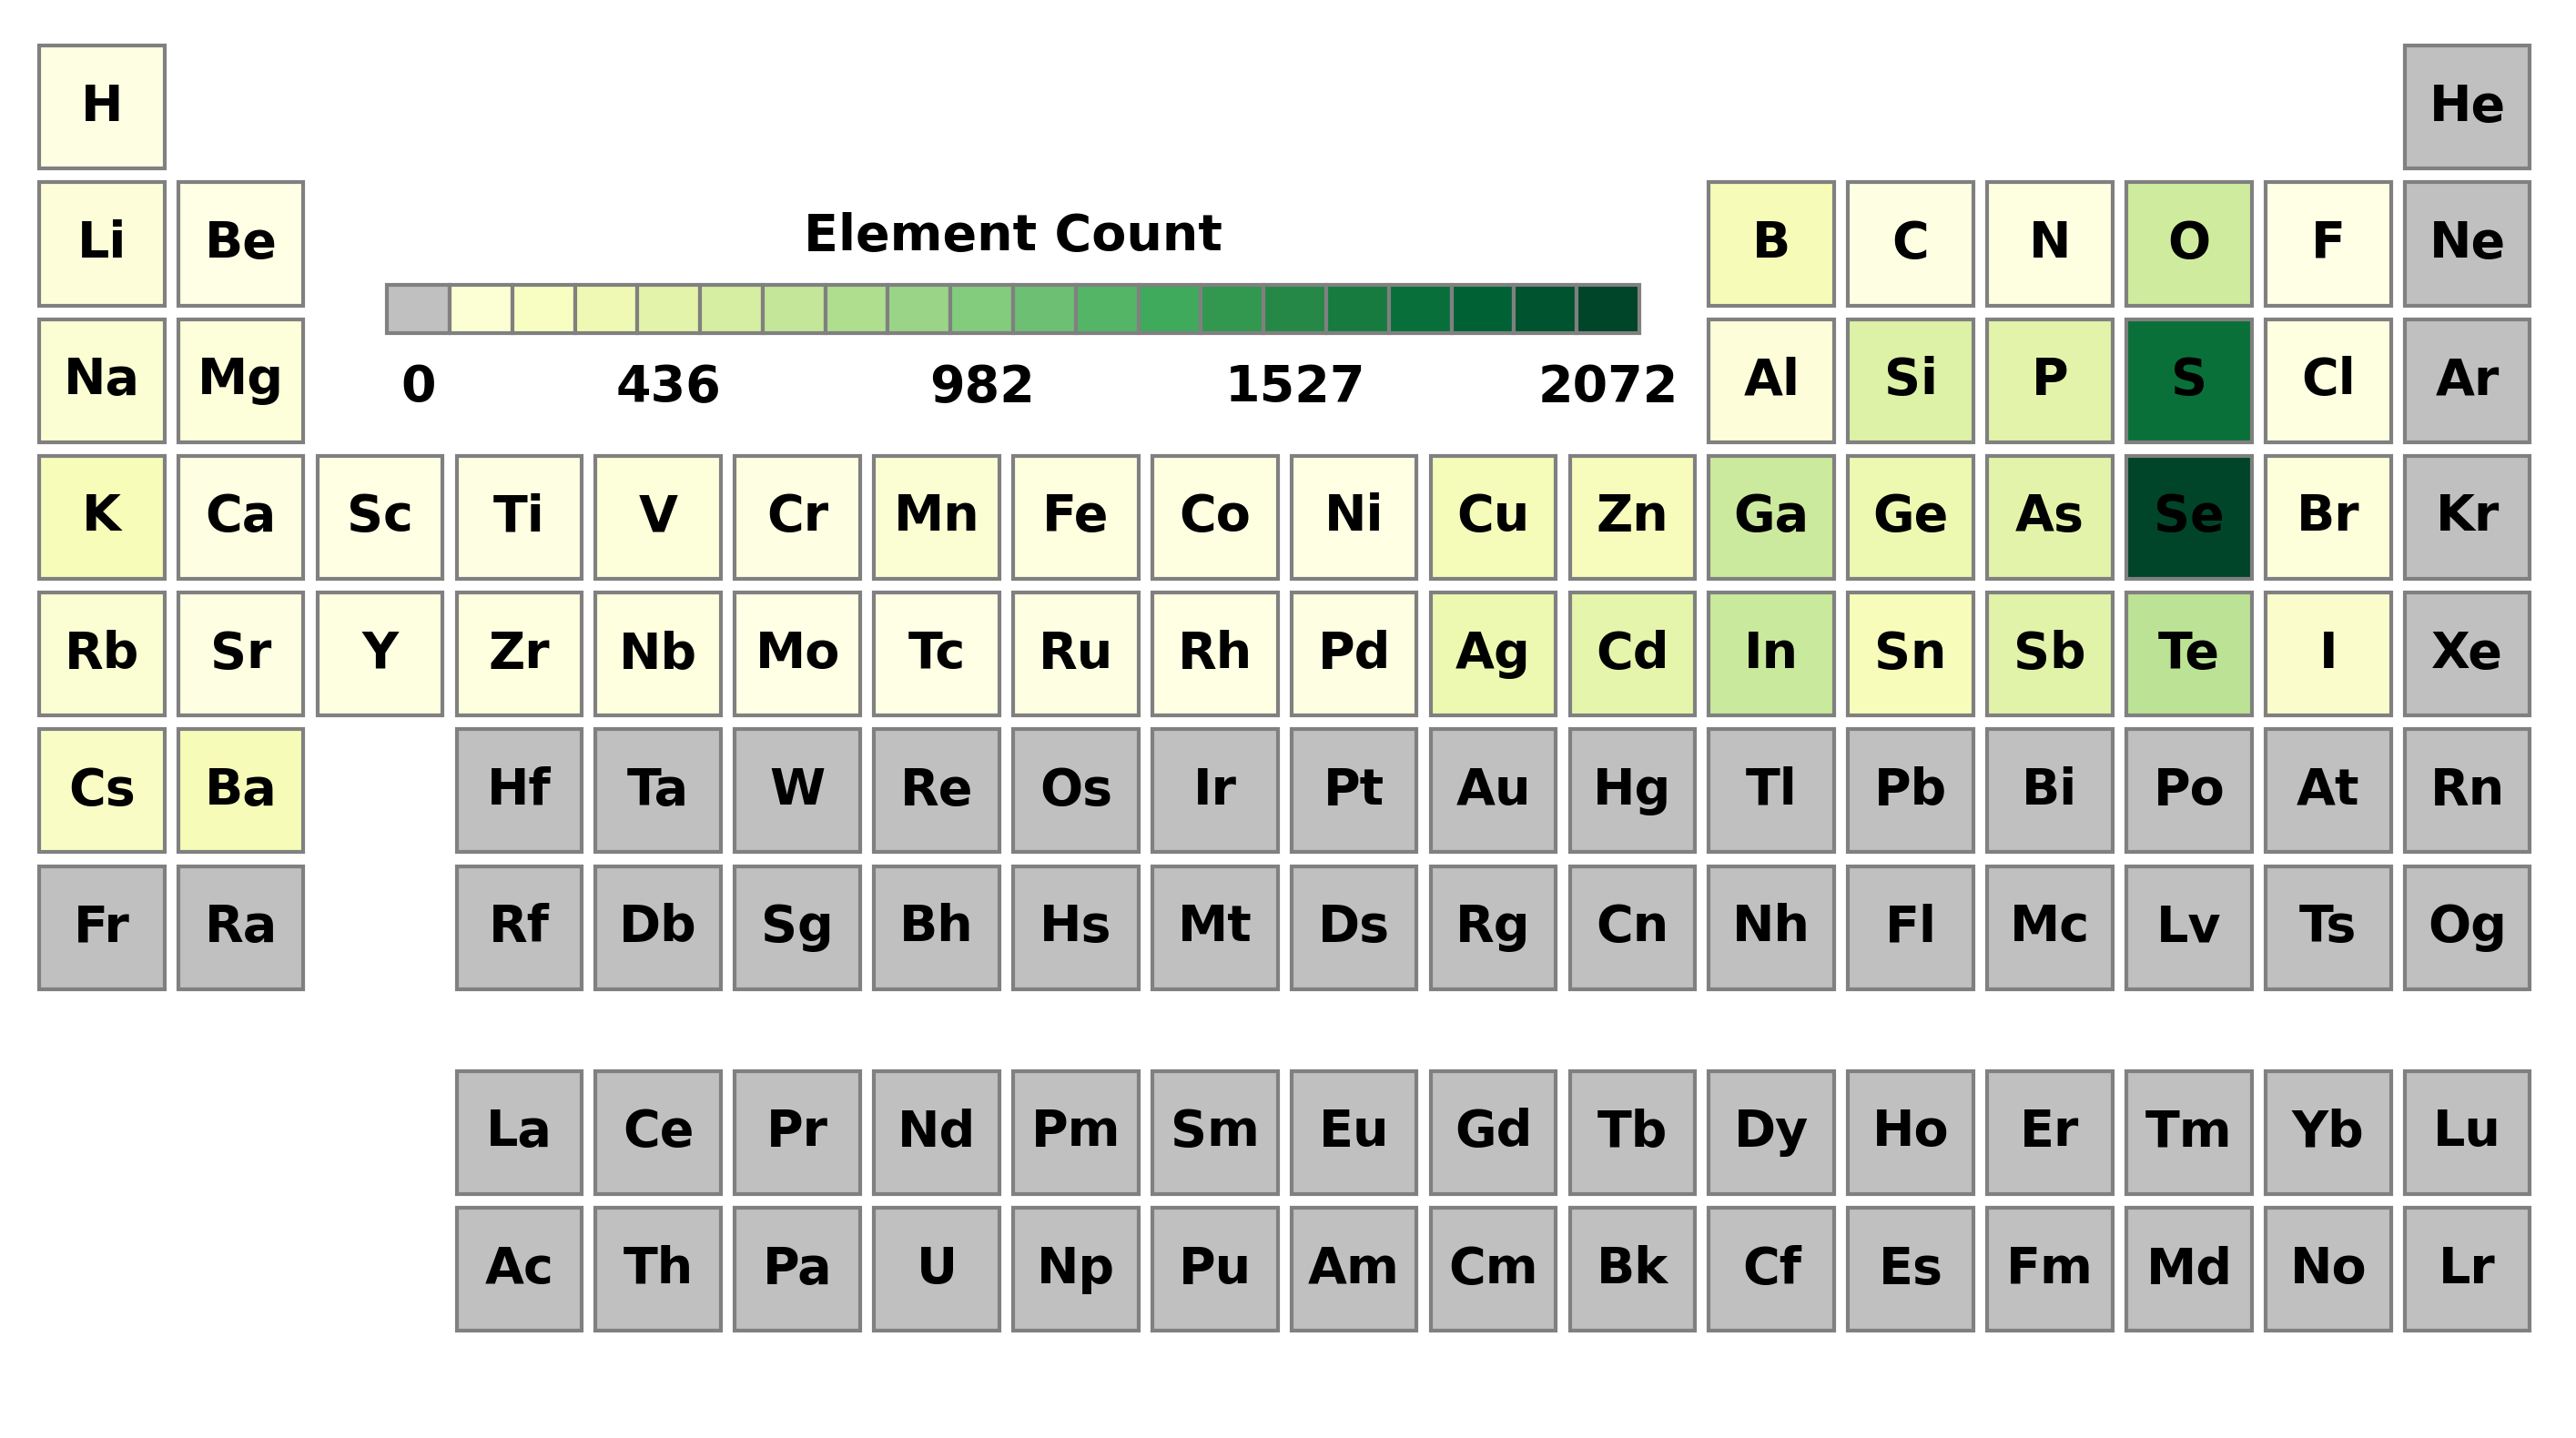

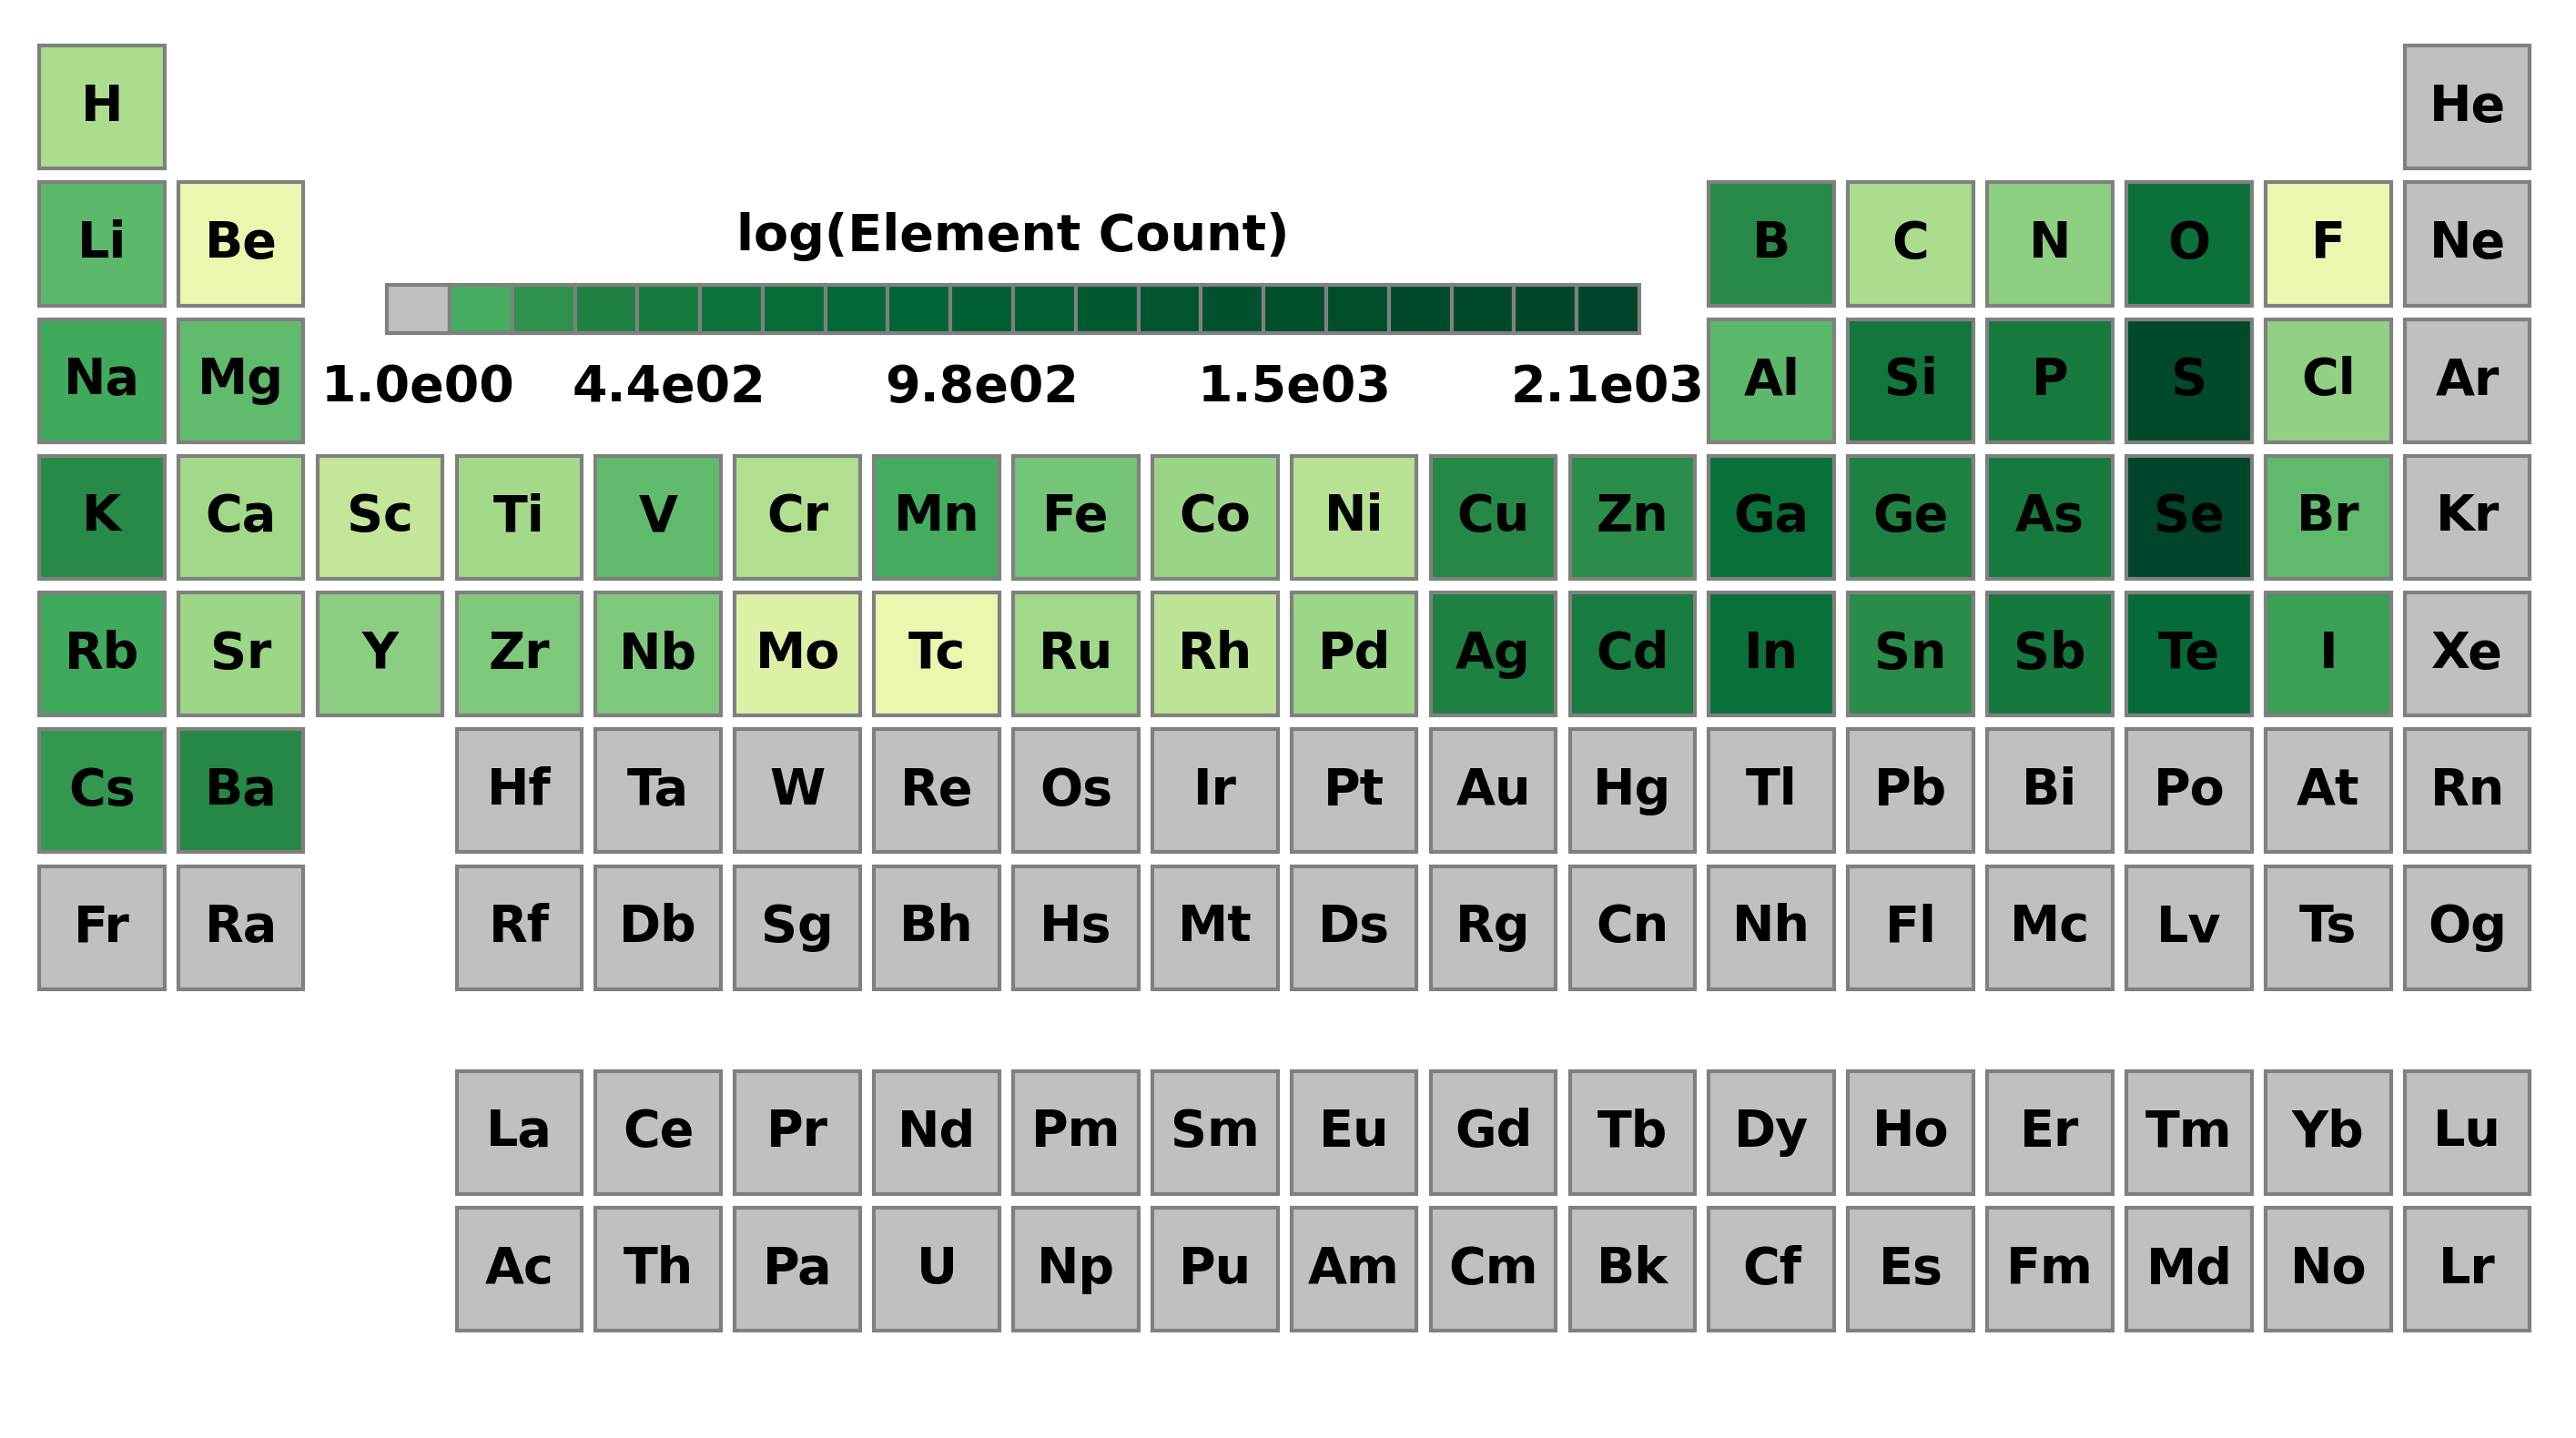

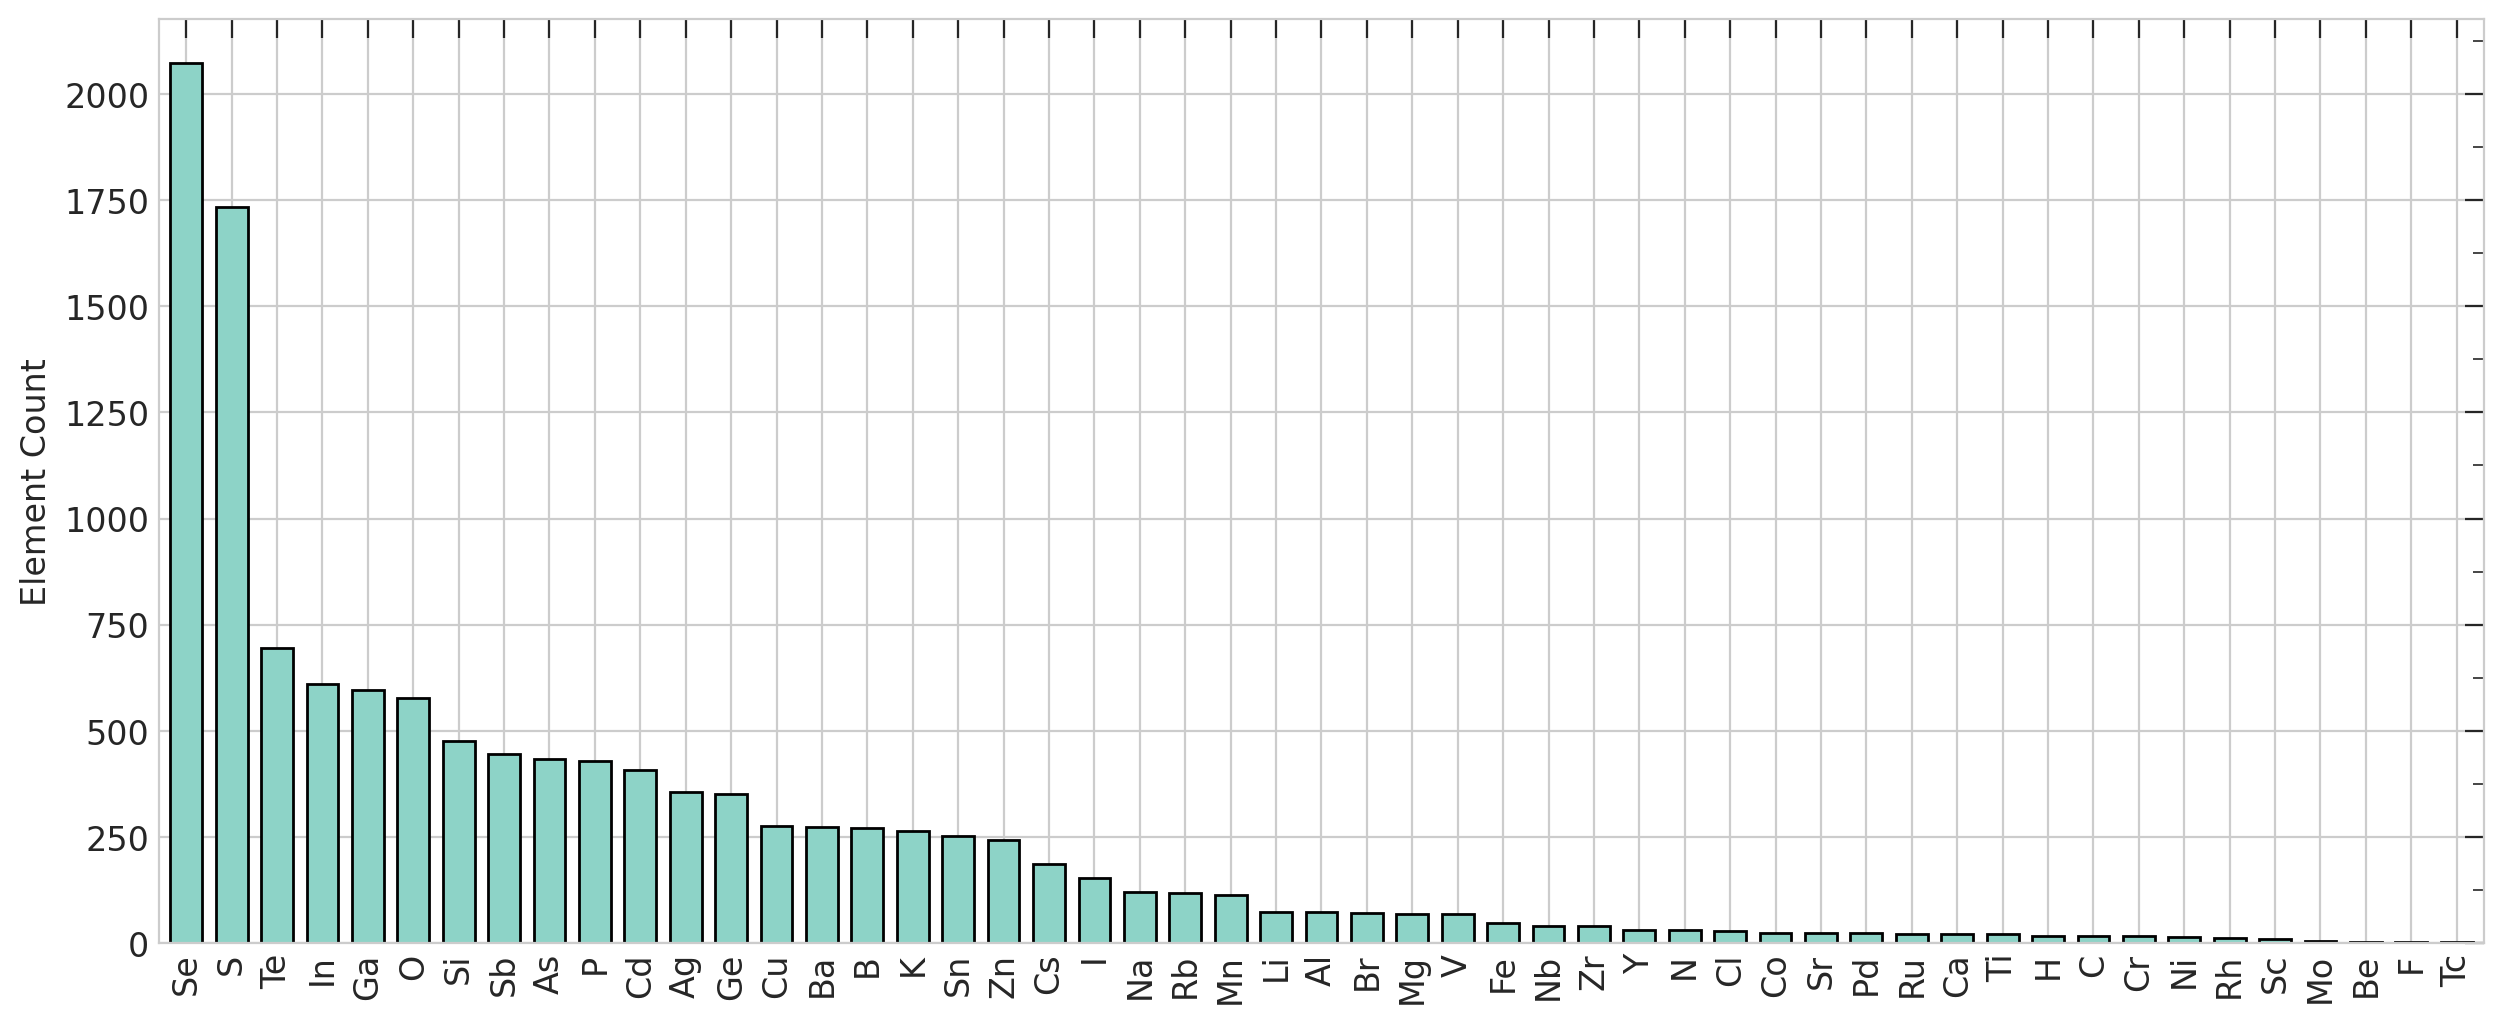

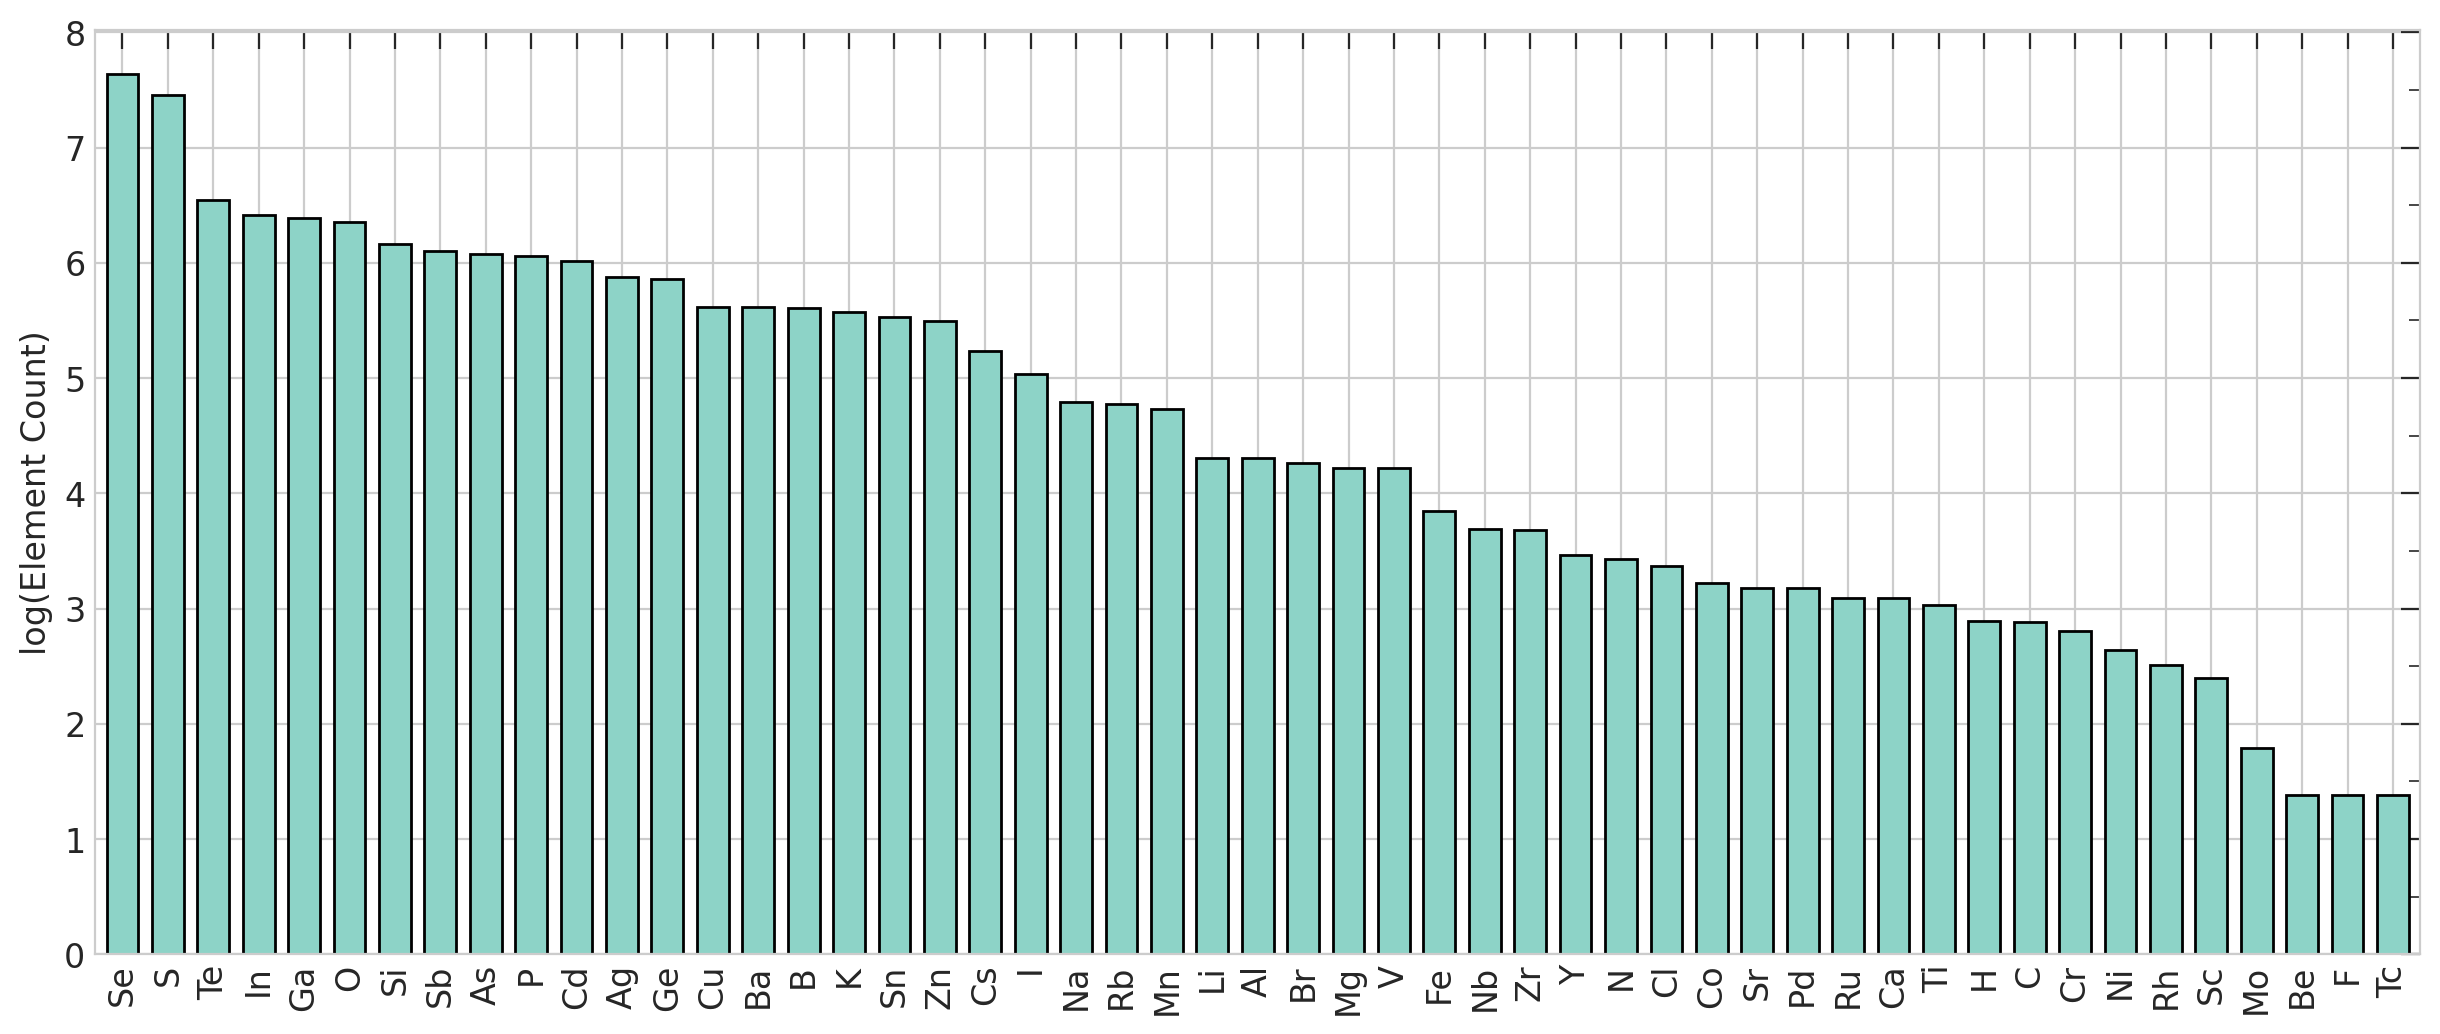

In [99]:
# To import the custom module from a specific path
import sys
sys.path.insert(0, os.path.join(current_dir, '../'))
from Utools.ML_figures.figures import element_prevalence
# Visualizing elemental prevalence in the exp dataset

current_dir = os.getcwd()
os.chdir('./Utools')  # Change to where ML_figures is a direct subdirectory

formula = exp_trans_df.iloc[:, 0]

save_dir = os.path.join(current_dir, './figures/element_prevalence/used_data/exp')
os.makedirs(save_dir, exist_ok=True)
element_prevalence(formula,
                   name='element_prevalence_ptable',
                   save_dir=save_dir,
                   log_scale=False)
element_prevalence(formula,
                   name='log_element_prevalence_ptable',
                   save_dir=save_dir,
                   log_scale=True)

plt.rcParams.update({'font.size': 12})
element_prevalence(formula,
                   name='element_prevalence',
                   save_dir=save_dir,
                   ptable_fig=False,
                   log_scale=False)
element_prevalence(formula,
                   name='log_element_prevalence',
                   save_dir=save_dir,
                   ptable_fig=False,
                   log_scale=True)

os.chdir(current_dir)  # Return to previous directory

In [100]:
distribution_save_dir = os.path.join(current_dir, 'figures', 'data_distribution', 'used_data', 'exp')
os.makedirs(distribution_save_dir, exist_ok=True)

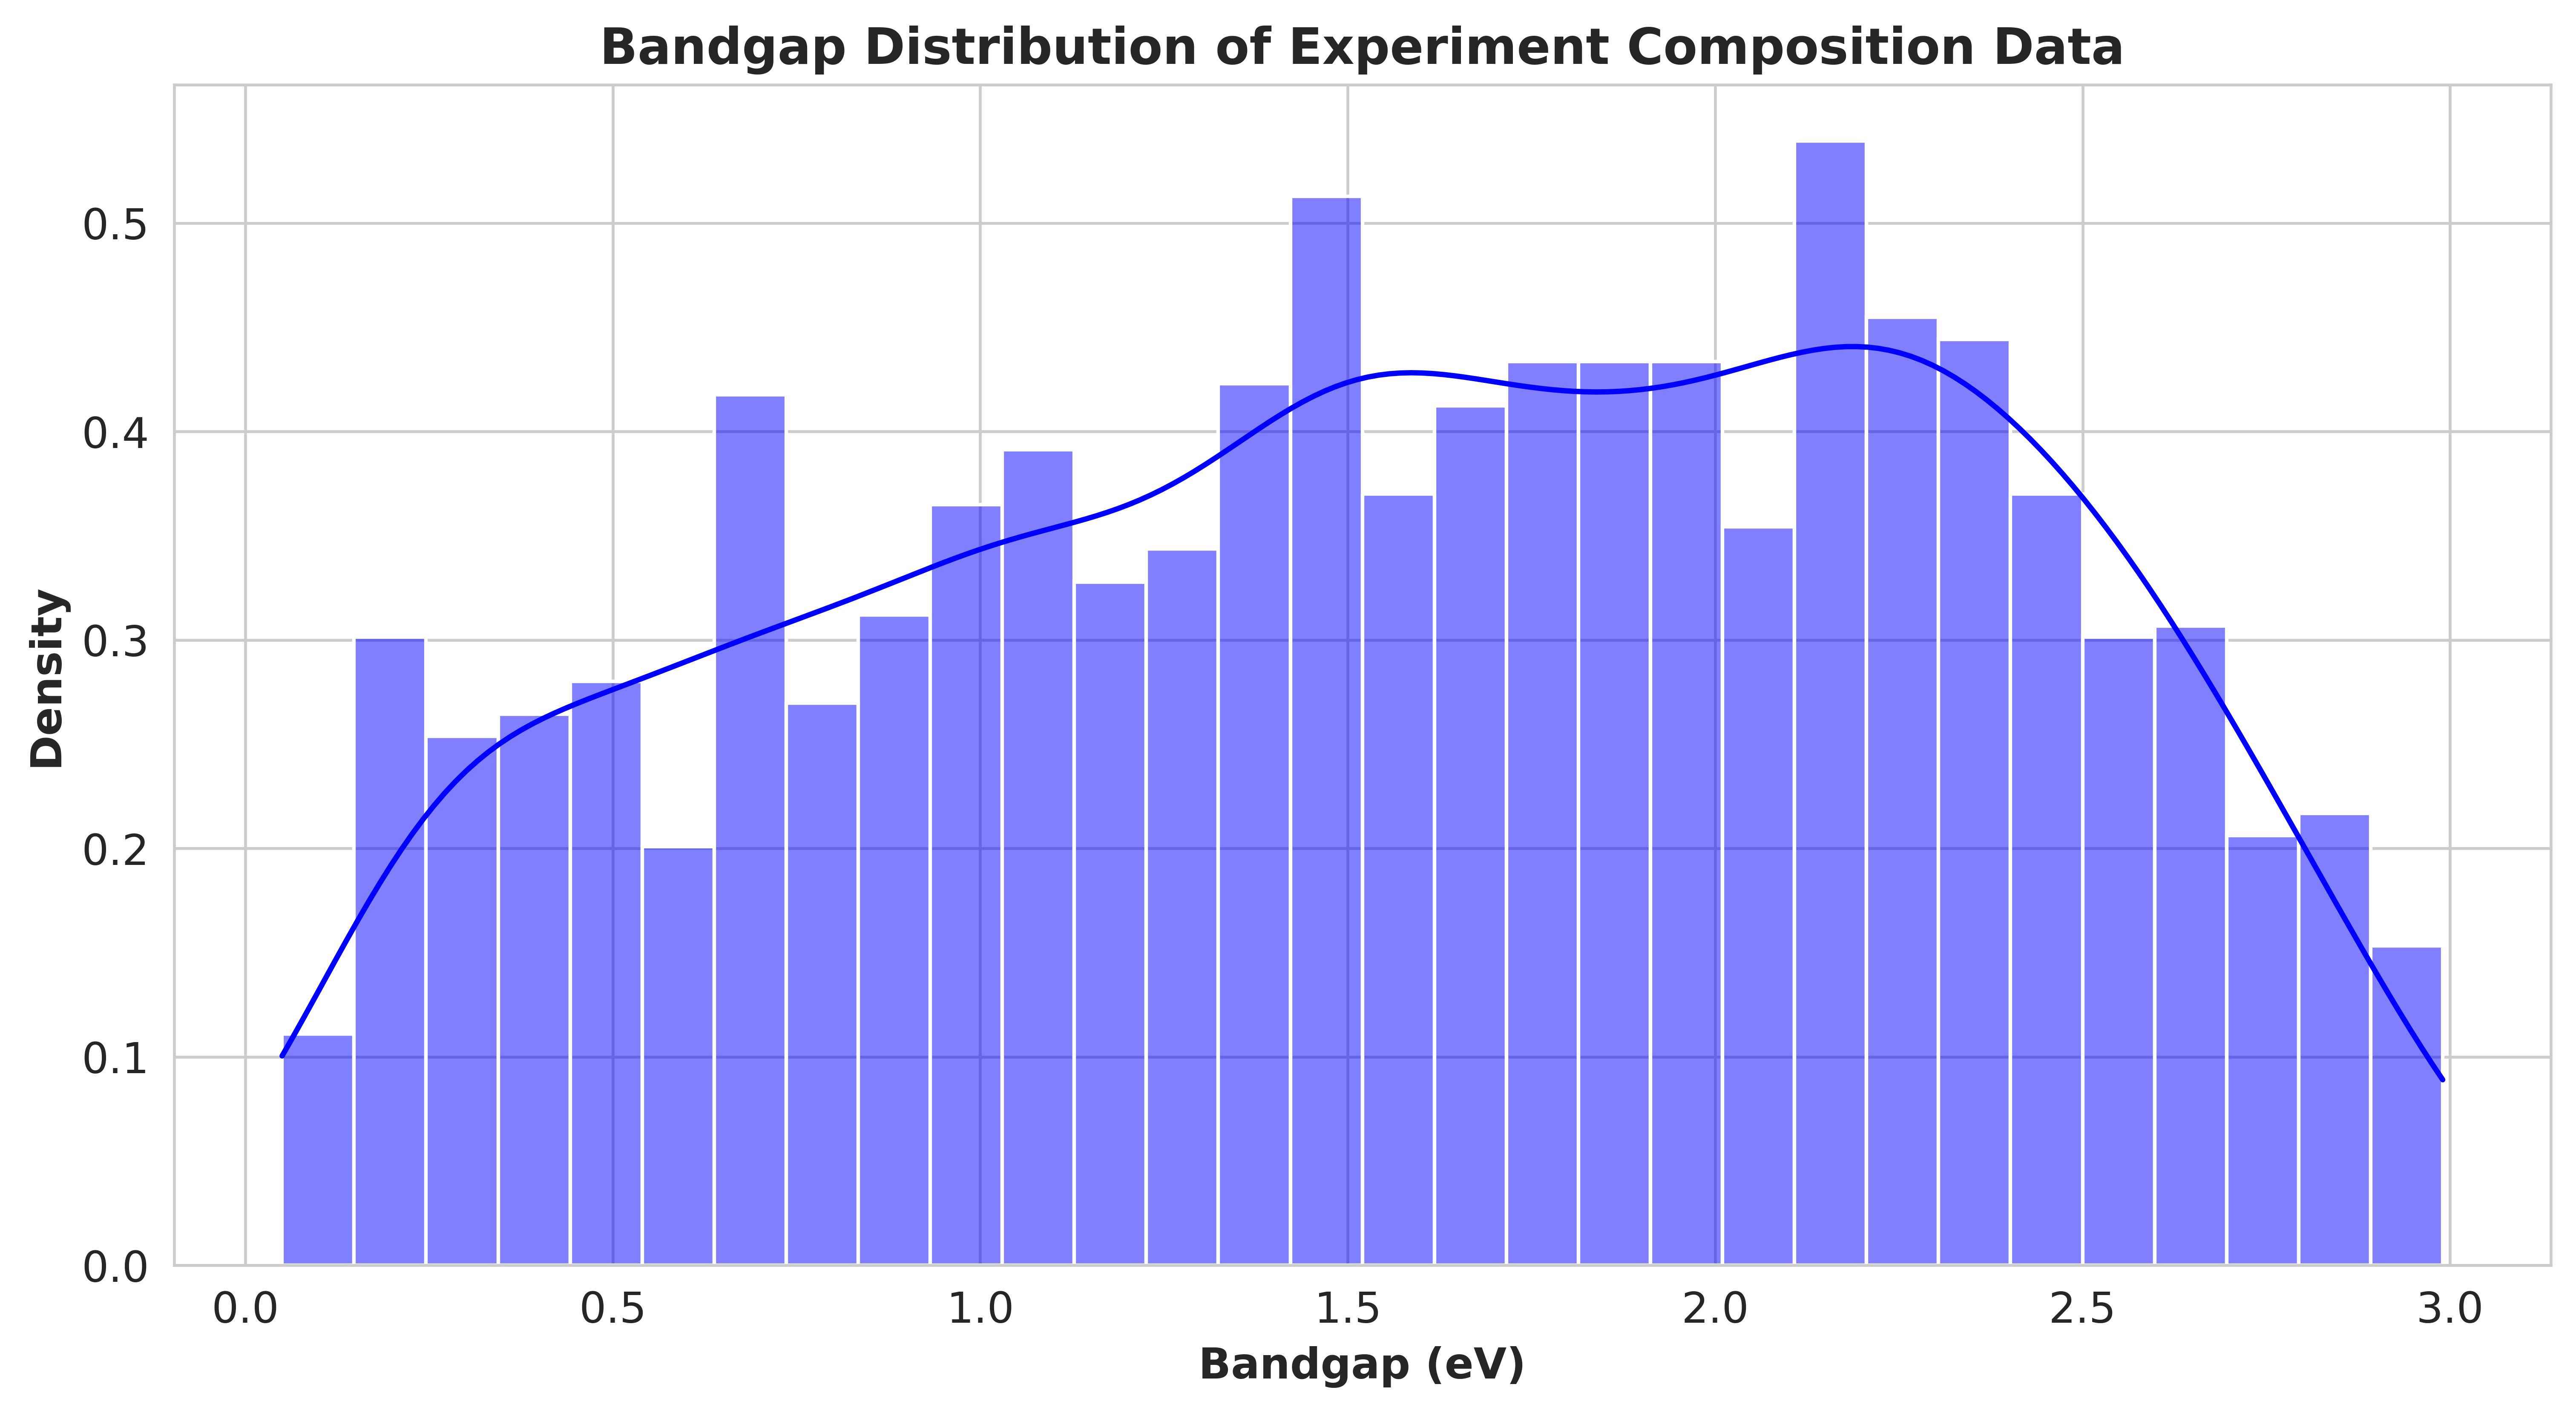

In [101]:
# draw a distribution plot of the bandgap

plt.figure(figsize=(12, 6), dpi=300)
sns.set_style("whitegrid")
sns.set_palette("Set3")  # Set3, RdBu
sns.histplot(exp_trans_df['band_gap'], kde=True, bins=30, color='blue', stat='density')
plt.title("Bandgap Distribution of Experiment Composition Data", fontsize=14, weight="bold")
plt.xlabel("Bandgap (eV)", fontsize=12, weight="bold")
plt.ylabel("Density", fontsize=12, weight="bold")

# save the figure
# Create the directory if it doesn't exist
plt.savefig(os.path.join(distribution_save_dir, 'bandgap_distribution.png'), dpi=300)
plt.show()

In [102]:
# 查看数据中氧化物和非氧化物的带隙分布情况
oxides_df = exp_trans_df[exp_trans_df['composition'].str.contains('O')]
non_oxides_df = exp_trans_df[~exp_trans_df['composition'].str.contains('O')]

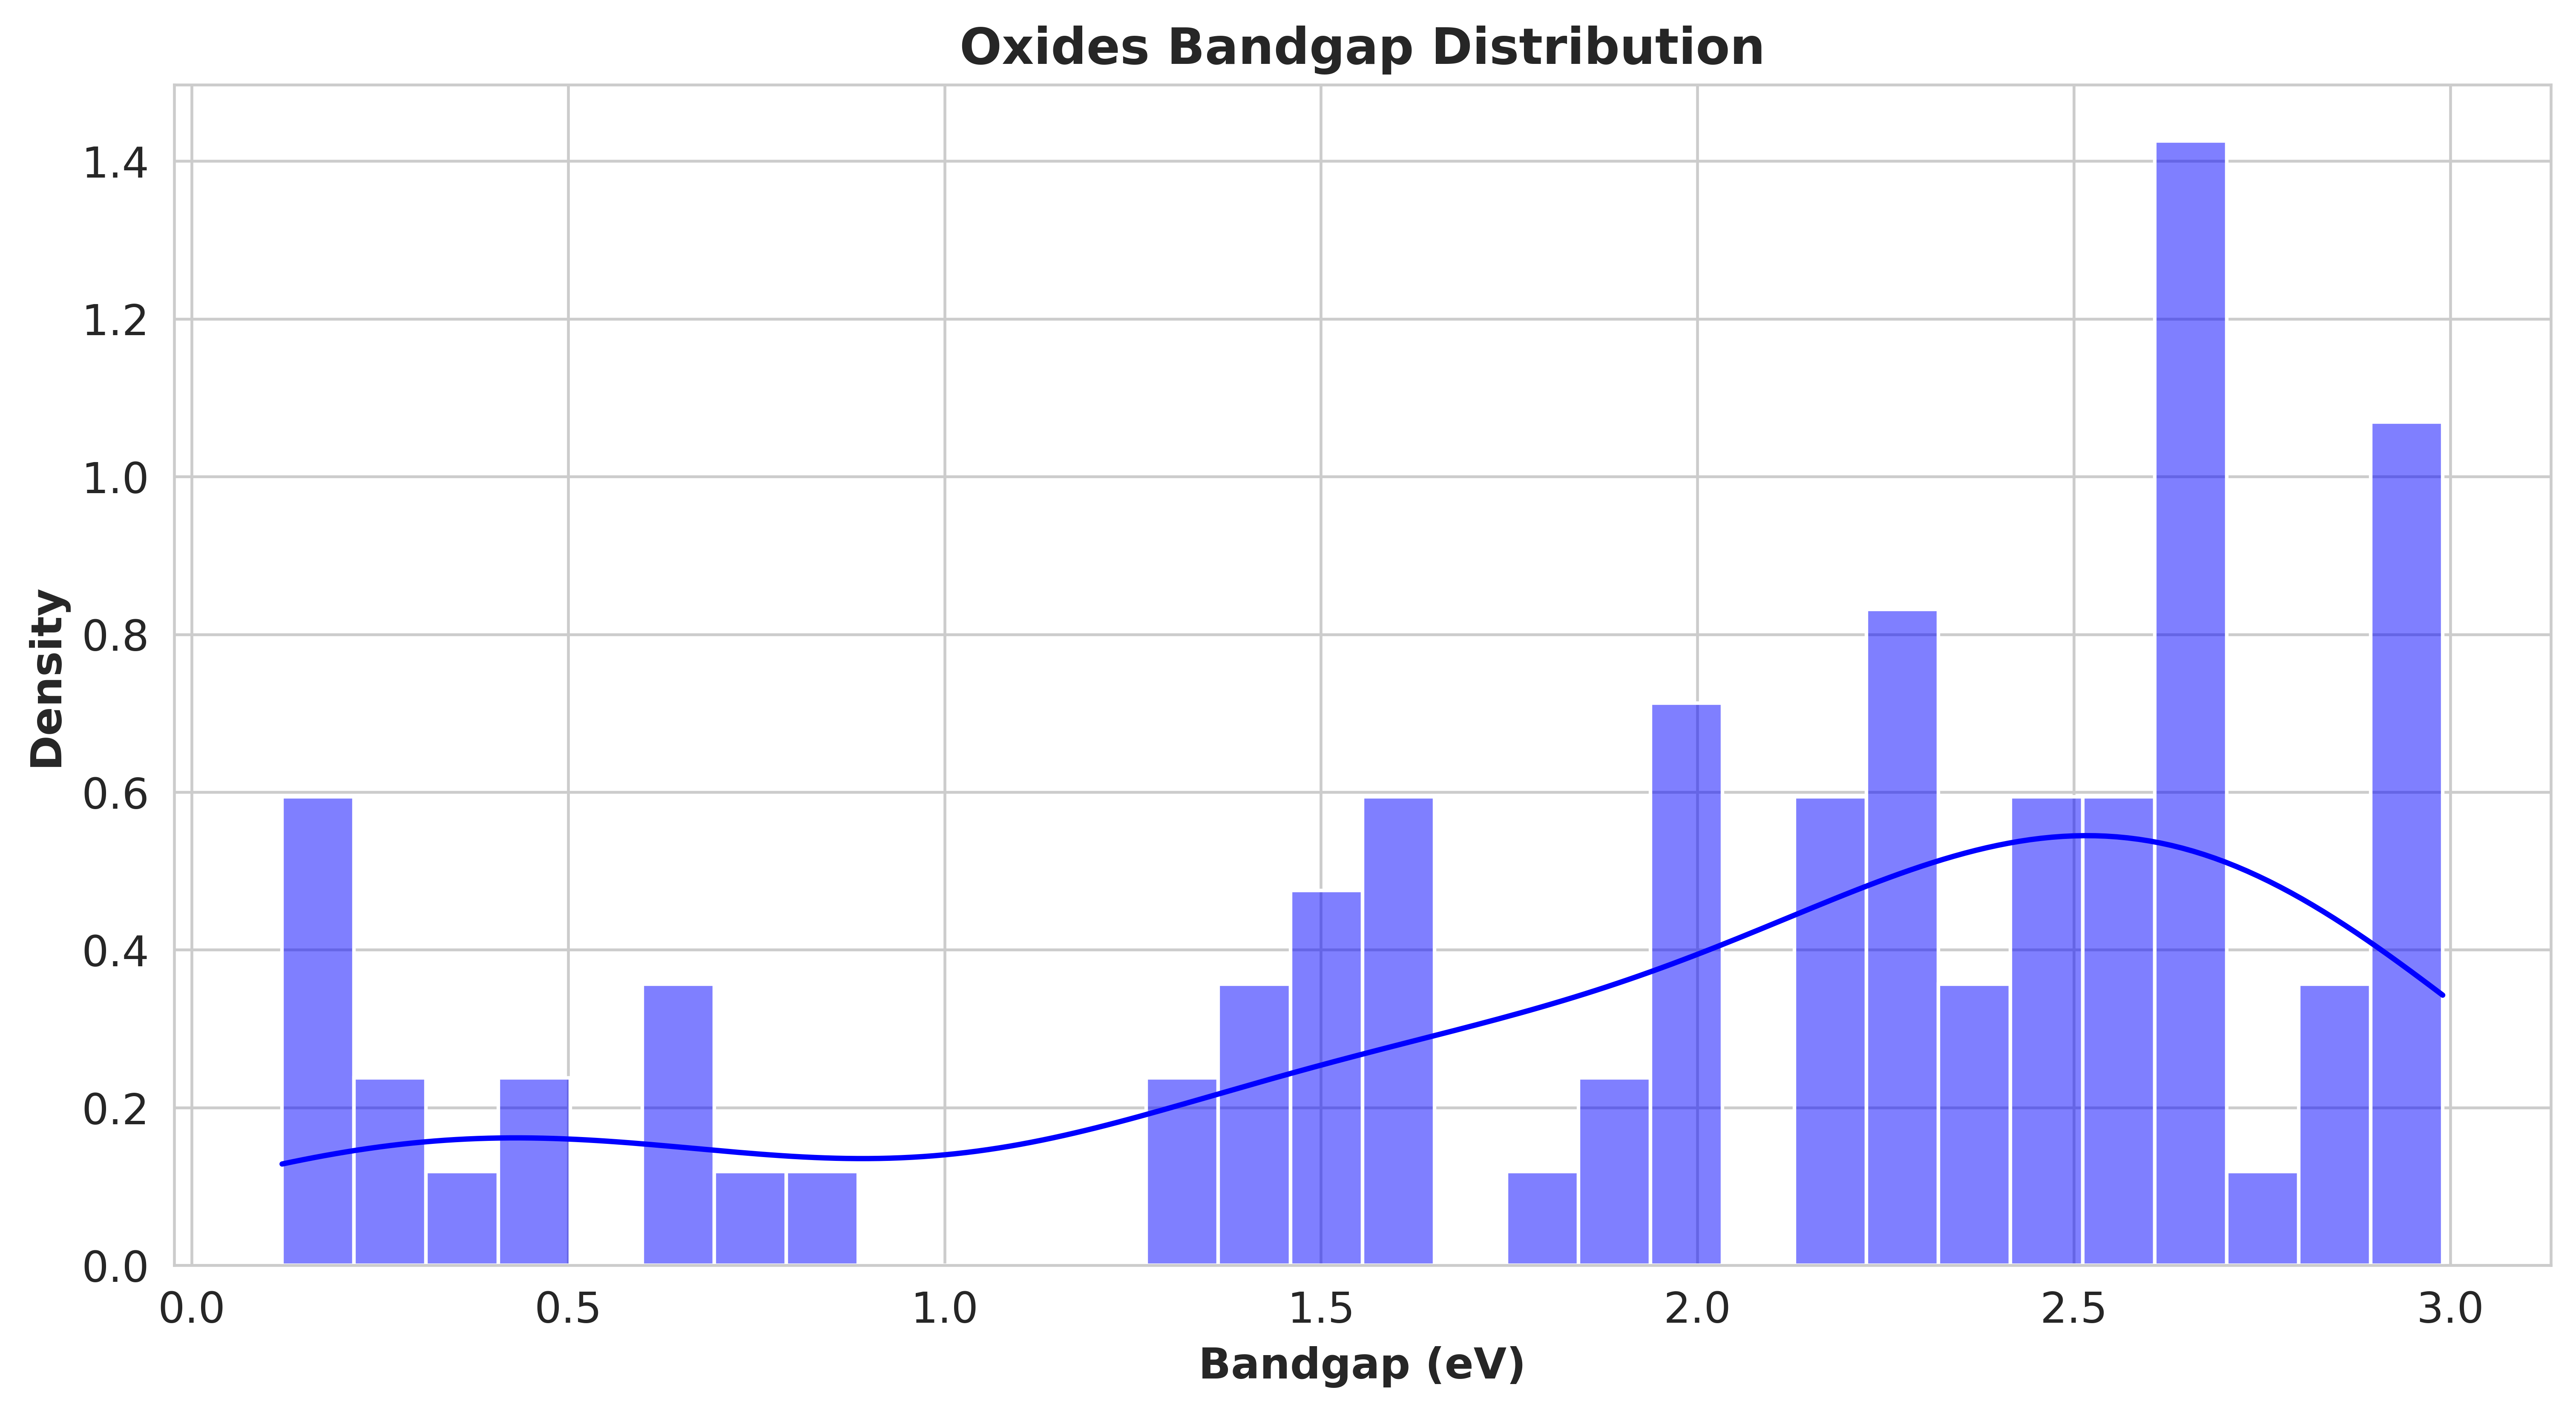

In [103]:
# draw a distribution plot of the oxides bandgap

plt.figure(figsize=(12, 6), dpi=300)
sns.set_style("whitegrid")
sns.set_palette("Set3")  # Set3, RdBu
sns.histplot(oxides_df['band_gap'], kde=True, bins=30, color='blue', stat='density')
plt.title("Oxides Bandgap Distribution", fontsize=14, weight="bold")
plt.xlabel("Bandgap (eV)", fontsize=12, weight="bold")
plt.ylabel("Density", fontsize=12, weight="bold")

# save the figure
plt.savefig(os.path.join(distribution_save_dir, 'oxides_bandgap_distribution.png'), dpi=300)
plt.show()

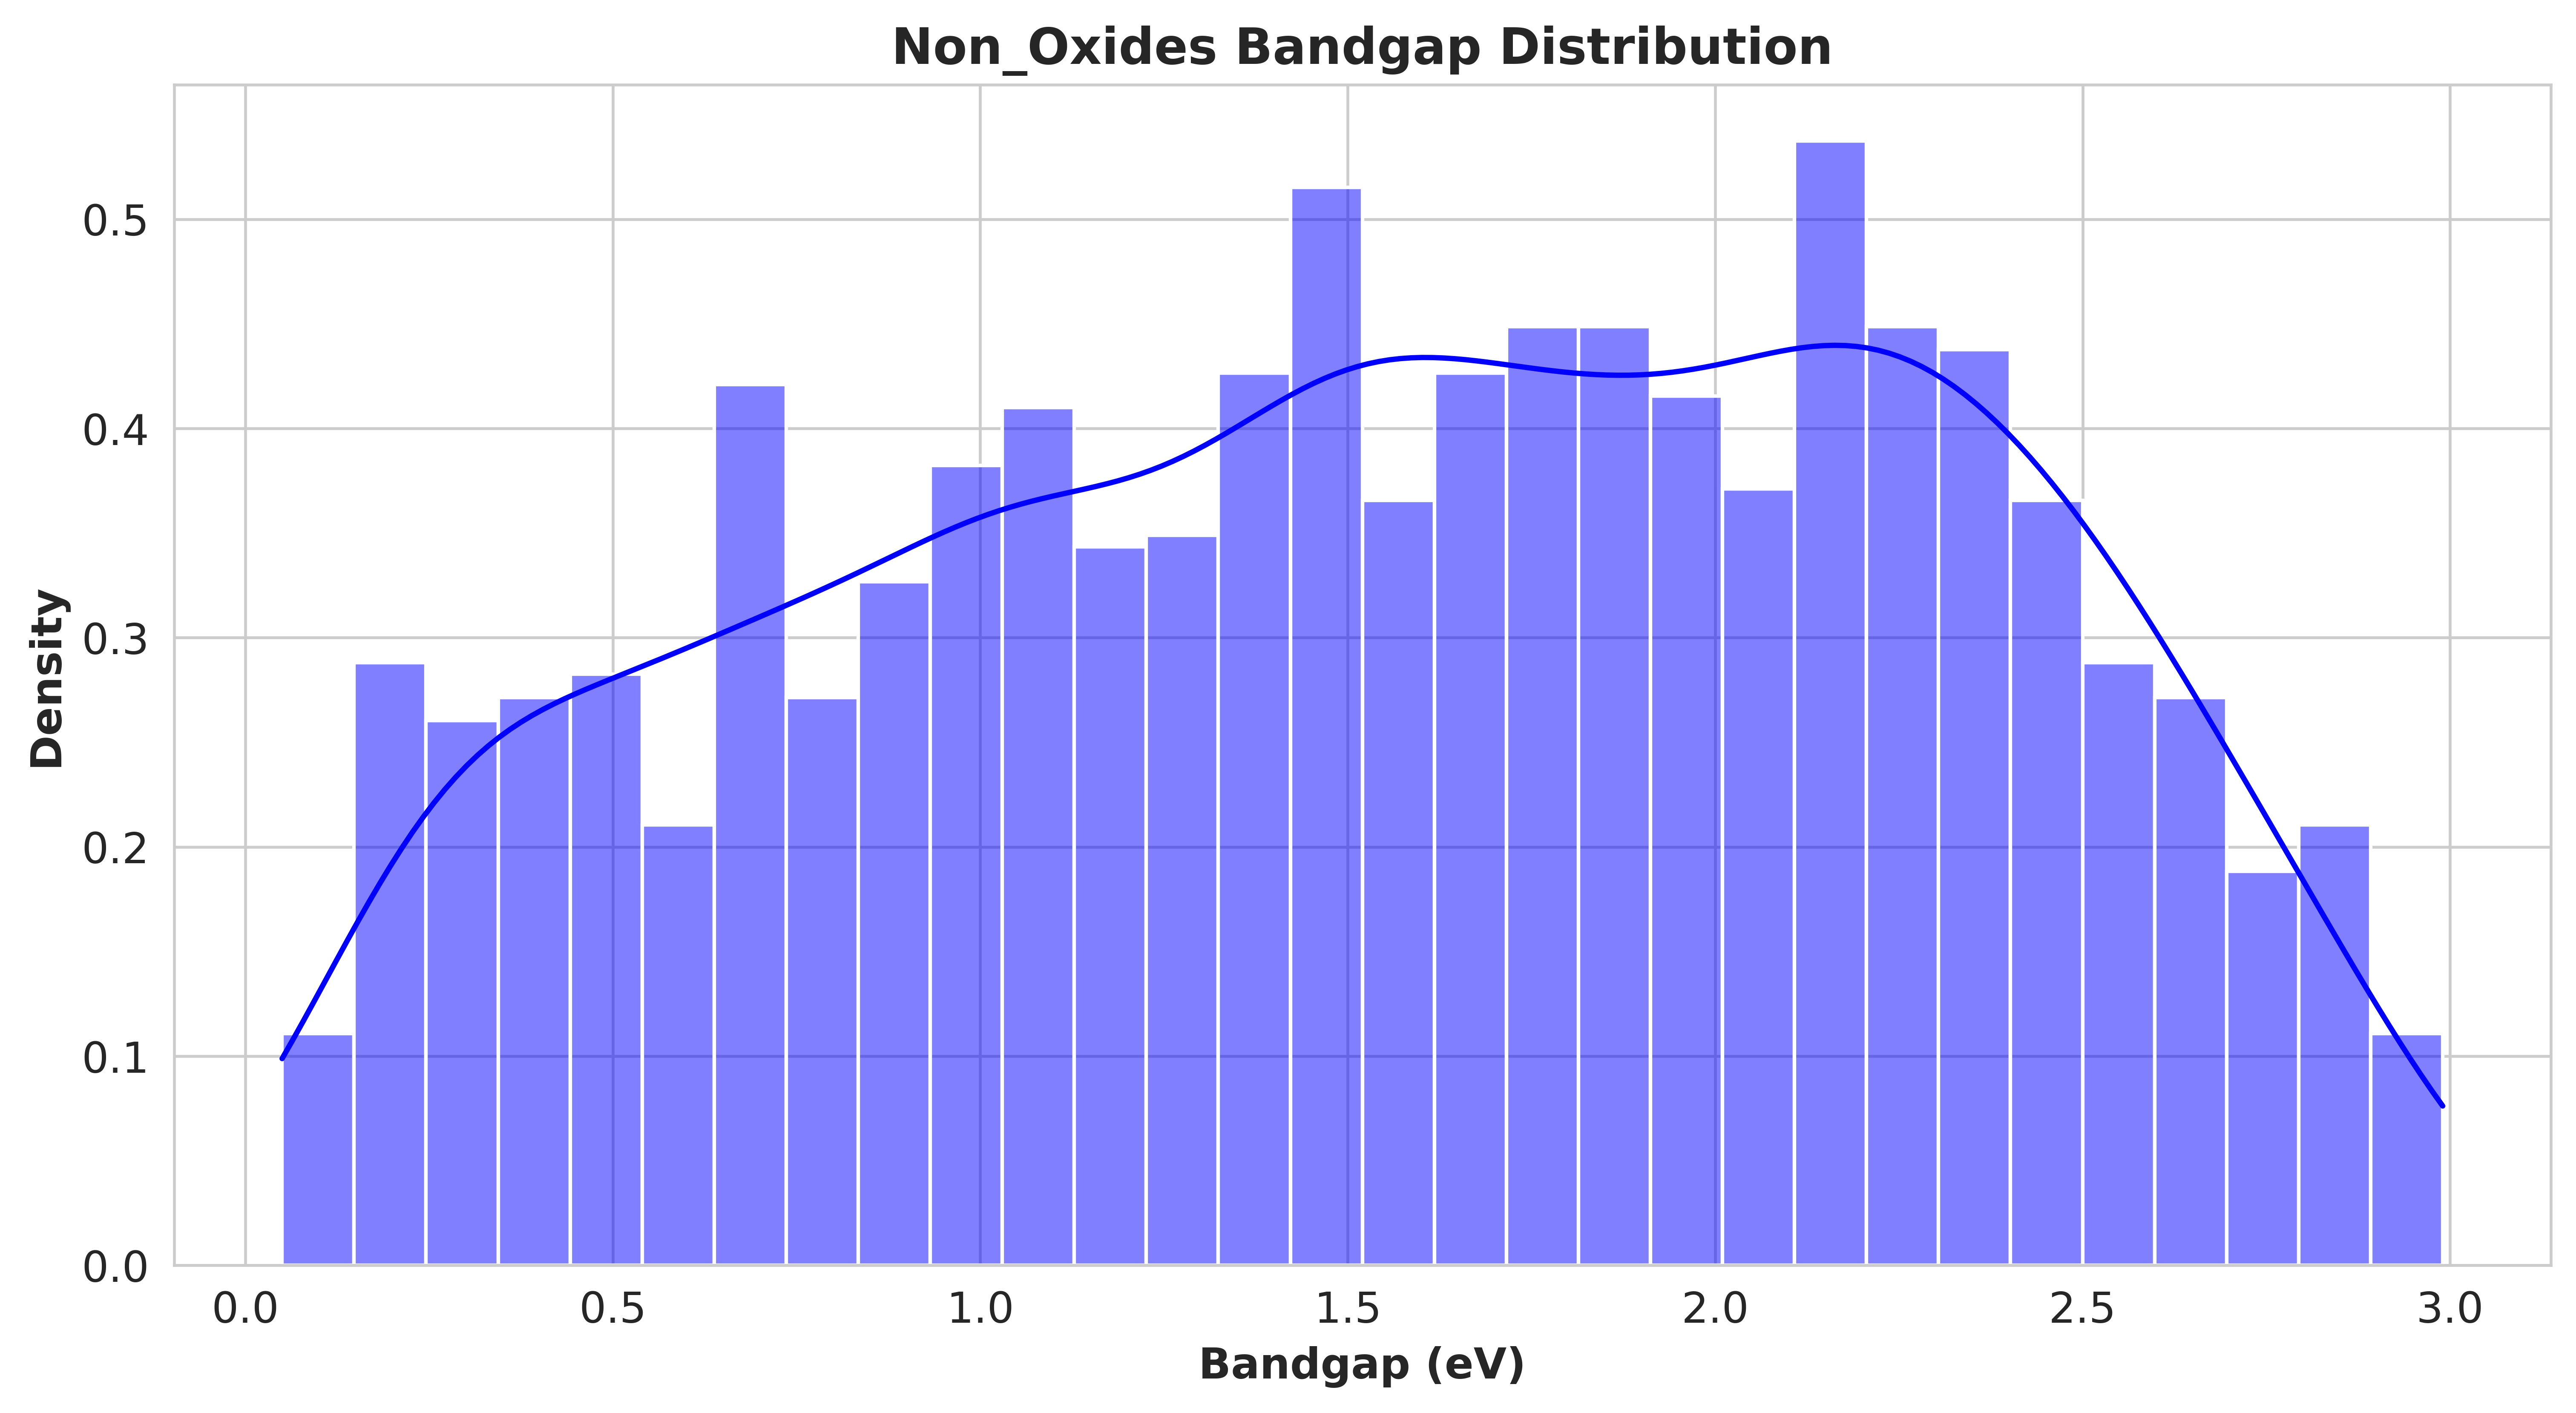

In [104]:
# draw a distribution plot of the non_oxides bandgap

plt.figure(figsize=(12, 6), dpi=300)
sns.set_style("whitegrid")
sns.set_palette("Set3")  # Set3, RdBu
sns.histplot(non_oxides_df['band_gap'], kde=True, bins=30, color='blue', stat='density')
plt.title("Non_Oxides Bandgap Distribution", fontsize=14, weight="bold")
plt.xlabel("Bandgap (eV)", fontsize=12, weight="bold")
plt.ylabel("Density", fontsize=12, weight="bold")

# save the figure
plt.savefig(os.path.join(distribution_save_dir, 'non_oxides_bandgap_distribution.png'), dpi=300)
plt.show()